<a href="https://colab.research.google.com/github/sherif17/Airlines-Passengers-Time-Series-analysis/blob/main/Time_Series_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Air Passengers Dataset - [link](https://www.kaggle.com/datasets/chirag19/air-passengers)**

This dataset provides monthly totals of a US airline passengers from 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers.

### **Contributers:**



Mahmoud Mohsen -> m.mohsen6497@gmail.com 

Sherif Ahmed -> sherif17.ahmed@gmail.com

Fatma Gamal -> fatmagamalgalal@gmail.com 

Muhammed Raafat -> mraafatinho@gmail.com 

Mohamed Ahmed -> Mohamedahmedsayed1999@gmail.com

Mohab Mohammed -> mohab.mohamed02@icloud.com


### **Problem Statement**

The airline industry relies heavily on forecasting passenger demand to optimize operational efficiency and profitability. However, accurately predicting passenger demand is a complex task due to various external and internal factors, such as seasonality, economic conditions, and marketing campaigns. In this project, we aim to develop a time series forecasting model using historical airline passenger data to accurately predict future passenger demand. The model should take into account different patterns and trends in the data, such as seasonality and trend, and incorporate external factors that affect passenger demand. The goal is to provide actionable insights to airline companies to make informed decisions on capacity planning, pricing, and marketing strategies.

1. The dataset will be evaluated using the**RMSE metric** and **three** different evaluation techniques: **roll-forward**, **simple train-test split**, and time series **cross-validation** from sklearn.

2. Exploratory data analysis will be conducted to analyze the time series data using visual plots and comment on the findings.

3. The following forecasting approaches will be applied and compared:
    * Simple Moving Average
    * Naïve Forecasting
    * Weight Moving Average
    * Simple Linear Regression Model
    * Classical Decomposition Approach
    * STL Decomposition Approach
    * ARIMA/S-ARIMA Model
    * Exponential Smoothing
    * Facebook Prophet Algorithm
    * Supervised Machine Learning algorithm (XGBOOST Regressor)
    
4. Each approach will be commented on to explain why the results are produced in that manner and their pros and cons.

5. Before applying any approach, stationarity of the time series data will be checked and necessary transformations will be applied.

6. The classical and STL decomposition approaches will be compared based on the decomposed components.

7. Different ARIMA models will be tested based on ACF, PACF plots, summary statistics, and residuals analysis, and the AIC or BIC will also be checked.
For exponential smoothing, single, double, and triple exponential smoothing approaches will be applied, and the need for dampening will be determined both theoretically and practically.

8. The Facebook Prophet algorithm will be applied, and its effectiveness will be assessed.

9. Finally, a supervised machine learning algorithm (XGBOOST Regressor) will be applied using lag features (Yt−1, Yt−2, ... , avg(yt−n)).

In summary, the project involves forecasting air passenger traffic using various time series forecasting techniques and comparing their effectiveness. The project will also include exploratory data analysis, checking stationarity, and model evaluation using multiple metrics and techniques.

## **Imports**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## **Reading DataSet** 

In [3]:
airline_df = pd.read_csv('/content/airline-passengers.csv')
airline_df['Month']= pd.to_datetime(airline_df['Month'])

In [ ]:
airline_df.tail()

,Month,Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Monthly data

## **Visual Plots**

#### Ploting time series data

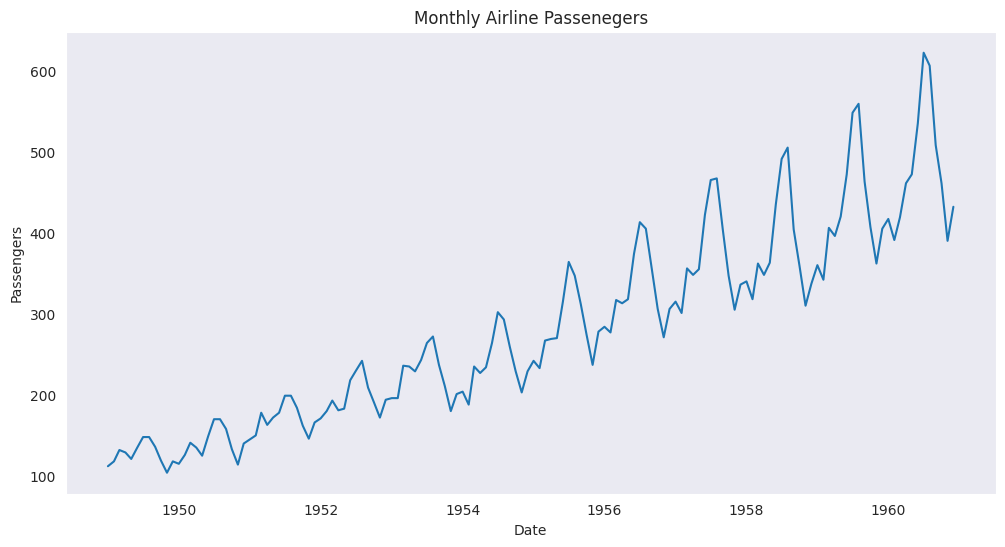

In [ ]:
plt.figure(figsize=(12,6));
plt.plot(airline_df.Month, airline_df.Passengers);
plt.xlabel('Date');
plt.ylabel('Passengers');
plt.title('Monthly Airline Passenegers');

**In conclusion:** 
*   This graph shows the number of airline passengers over time.
*   There is a clear **increasing trend** in the number of passengers from 1949 to 1960.
*   There is some **seasonal fluctuations**. This information can be useful for the airline industry to understand passenger demand and plan their operations accordingly.





#### Checking Outliers

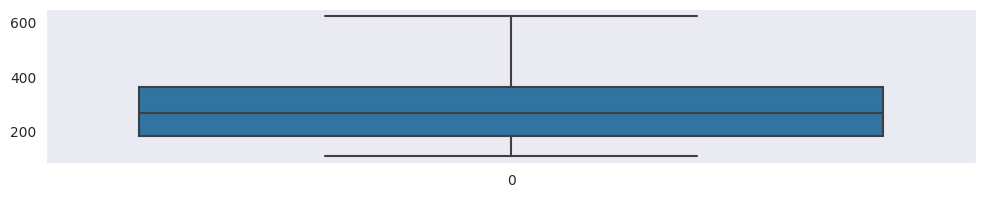

In [ ]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(airline_df['Passengers'], whis=1.5)

**In Conclusion:**

There is no outliers detected.

#### Histogram plot

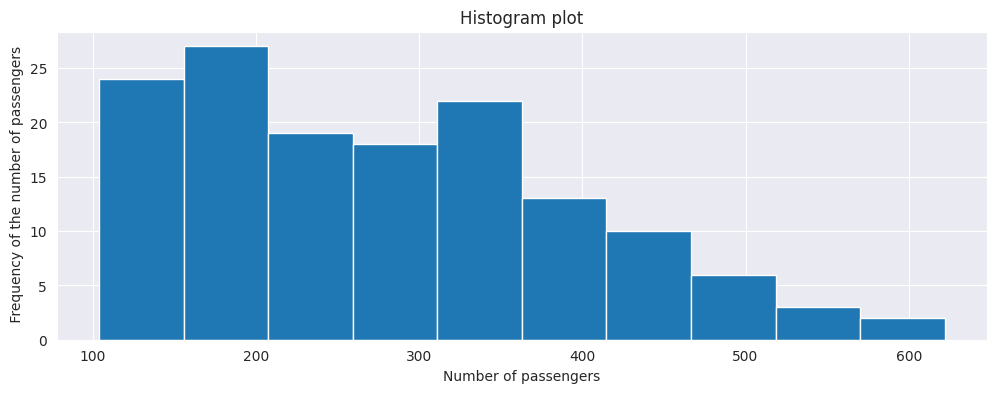

In [ ]:
airline_df['Passengers'].hist(figsize=(12,4))
plt.xlabel('Number of passengers');
plt.ylabel(' Frequency of the number of passengers');
plt.title('Histogram plot');

Conclusion:
*   We can see that the frequency of the number of passengern are nice and continious. 
*   As the number of passengers increases, the frequency of that number of passengers decreases.
*   Not a bell curve-like shape of the Gaussian distribution. **"Non-stationary"**



#### Time Series Decomposition

##### Additive seasonal decomposition

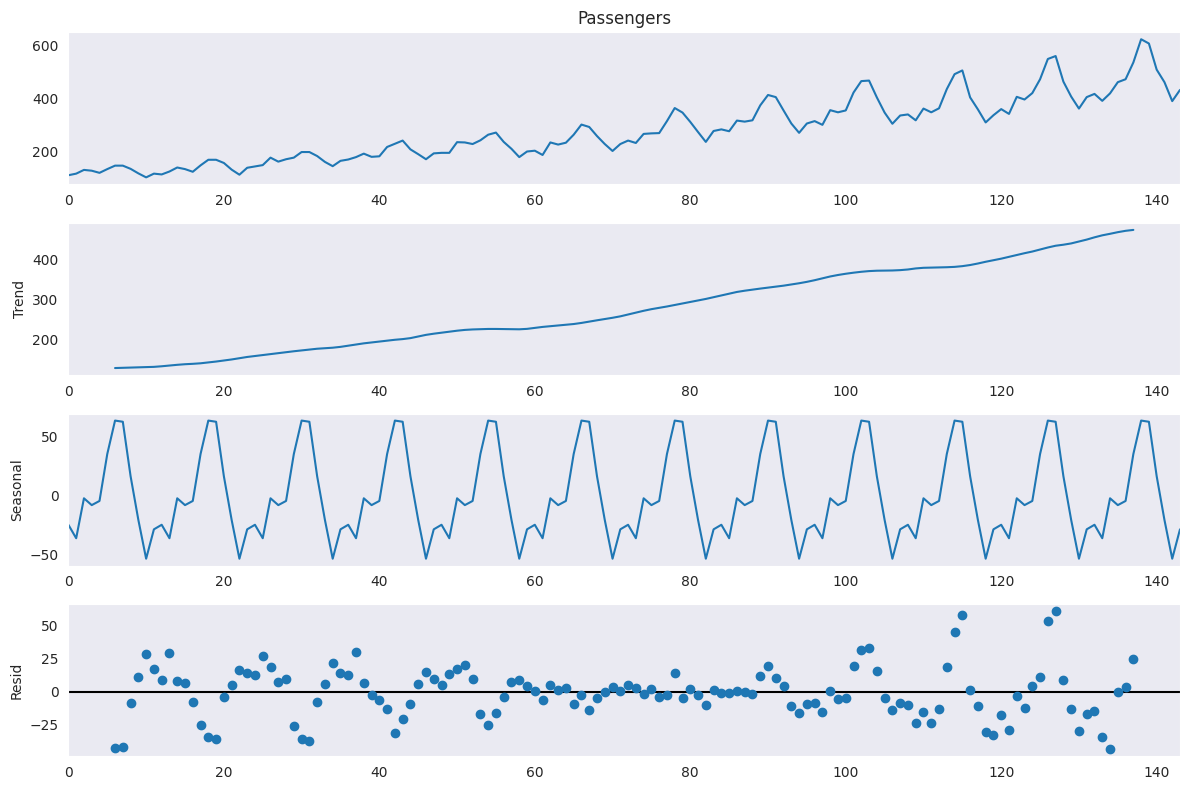

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(airline_df.Passengers, model='additive',period=12)
fig = decomposition.plot()
plt.show()

Analysis:-
1. ***Observed*** - Actual data
2. ***Trend*** - Increasing or decreasing trend.
3. ***Seasonal*** - 
    - Varies from +50 to -50 with the mean 0. 
    - Each cycle represents each year trend.
    - The value in the Y-axis has to be `added` to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is +50 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 50+100 = 150.
4. ***Residual*** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)


##### Multiplicative seasonal decomposition

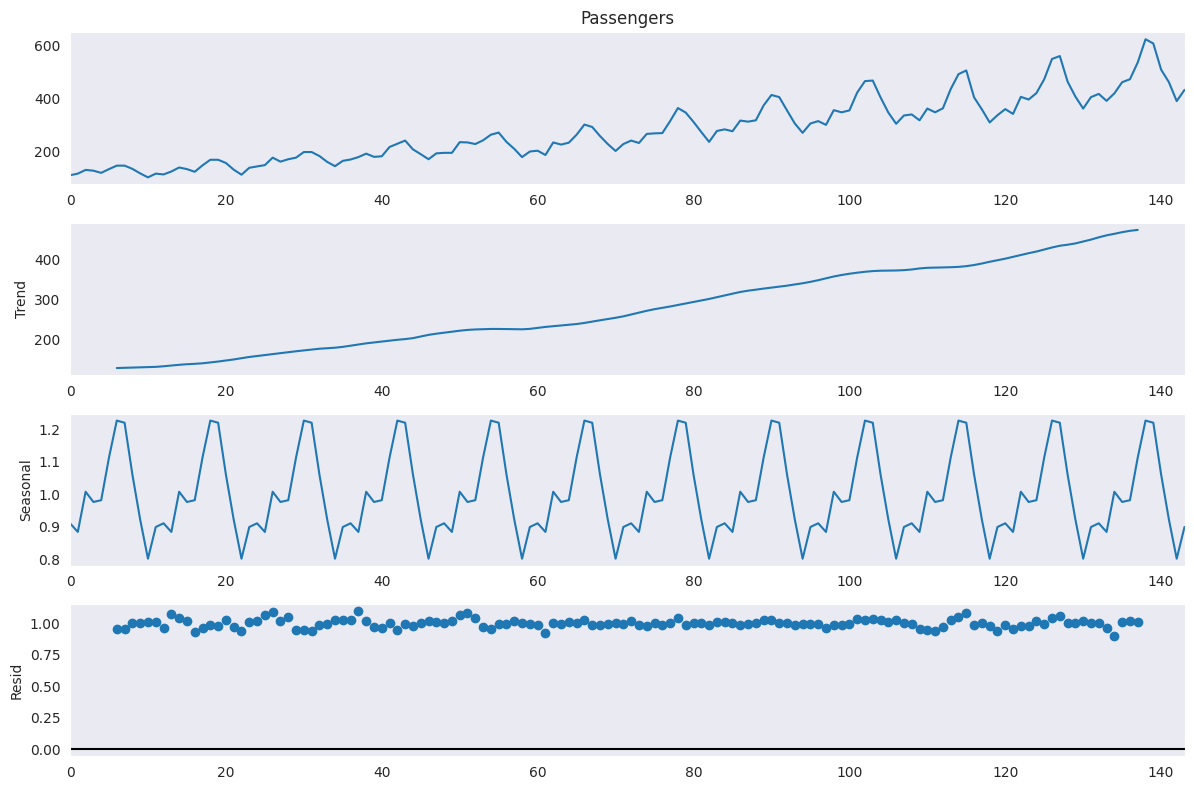

In [ ]:
decomposition = sm.tsa.seasonal_decompose(airline_df['Passengers'], model='multiplicative',period=12)
fig = decomposition.plot()
plt.show()

Analysis:-

***Seasonal*** - 
1. Varies from 0.8 to 1.2 
2. The value in the Y-axis has to be `multiplied` to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is `1.2` and the trend value is `100`. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.


## **Model Evaluation**

In [ ]:
airline_df.shape

(144, 2)

### 1. Train-Test Split

In [ ]:
def Train_Test_Split(train_percent=0.7):
  # train test split with respect to order
  train_size = int(airline_df.shape[0] * train_percent)
  return airline_df.iloc[:train_size,:] , airline_df.iloc[train_size:, :],train_size


In [ ]:
airline_df_train, airline_df_test,train_size= Train_Test_Split(train_percent=0.7)

In [ ]:
airline_df_train

,Month,Passengers,log_data,fd_lag_12,t,fitted_curve_values,deseasonalized_model_fit,fitted_curve_values_10,deseasonalized_model_fit_10,fd_lag
0,1949-01-01,112,4.718499,NaN,0,4.823717,-0.105218,4.923951,-0.205452,NaN
1,1949-02-01,118,4.770685,NaN,1,4.833765,-0.063080,4.923951,-0.153266,0.052186
2,1949-03-01,132,4.882802,NaN,2,4.843813,0.038988,4.923951,-0.041149,0.112117
3,1949-04-01,129,4.859812,NaN,3,4.853862,0.005951,4.923956,-0.064143,-0.022990
4,1949-05-01,121,4.795791,NaN,4,4.863910,-0.068120,4.923971,-0.128180,-0.064022
...,...,...,...,...,...,...,...,...,...,...
95,1956-12-01,306,5.723585,0.095964,95,5.778313,-0.054728,5.835999,-0.112414,0.121466
96,1957-01-01,315,5.752573,0.103598,96,5.788361,-0.035789,5.850393,-0.097820,0.028988
97,1957-02-01,301,5.707110,0.083093,97,5.798410,-0.091299,5.864319,-0.157209,-0.045462
98,1957-03-01,356,5.874931,0.116029,98,5.808458,0.066473,5.877664,-0.002733,0.167820


In [ ]:
airline_df_test.shape

(44, 2)

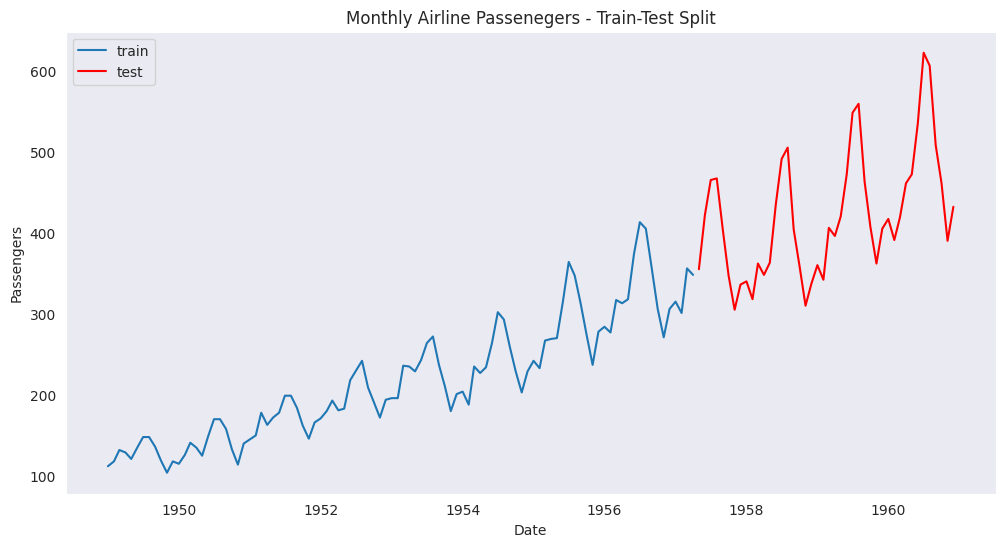

In [ ]:
plt.figure(figsize=(12,6));
plt.plot(airline_df_train.Month, airline_df_train.Passengers);
plt.plot(airline_df_test.Month, airline_df_test.Passengers, color='red');
plt.xlabel('Date');
plt.ylabel('Passengers');
plt.title('Monthly Airline Passenegers - Train-Test Split');
plt.legend(['train', 'test']);

### 2. Multiple Train-Test Splits

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
def Cross_Validation(input_n_splits=5,input_test_size=12,input_max_train_size = None):
    '''
    n_splits = 12 >> 1 years
    n_splits = 24 >> 2 years
    n_splits = 36 >> 3 years
    ---------------------------------
    max_train_size = None >> expanding
    max_train_size = value >> sliding 
    '''  
    splits = TimeSeriesSplit(n_splits=input_n_splits,test_size=input_test_size,max_train_size=input_max_train_size)
    X = airline_df.Passengers.values
    return splits.split(X)

In [ ]:
X = airline_df.Passengers.values
Cross_Validation_Data = Cross_Validation(3,None,None)
for train_index, test_index in Cross_Validation_Data:
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))


Observations: 72
Training Observations: 36
Testing Observations: 36
Observations: 108
Training Observations: 72
Testing Observations: 36
Observations: 144
Training Observations: 108
Testing Observations: 36


### 3. Walk (Roll) Forward Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
def Roll_Forward(input_n_splits=12,input_test_size=1,input_max_train_size=None): 
  '''
  n_splits = 12 >> 1 years
  n_splits = 24 >> 2 years
  n_splits = 36 >> 3 years
  ---------------------------------
  max_train_size = None >> expanding
  max_train_size = value >> sliding 
  '''   
  splits = TimeSeriesSplit(n_splits = input_n_splits,test_size=input_test_size,max_train_size=input_max_train_size)
  X = airline_df.Passengers.values
  return splits.split(X)

In [ ]:
Roll_Forward_Data = Roll_Forward(20,1)
X = airline_df.Passengers.values

for train_index, test_index in Roll_Forward_Data:
    train = X[train_index]
    test = X[test_index]
    print('train=%d, test=%d' % (len(train), len(test)))
    # print(train, test)


train=124, test=1
train=125, test=1
train=126, test=1
train=127, test=1
train=128, test=1
train=129, test=1
train=130, test=1
train=131, test=1
train=132, test=1
train=133, test=1
train=134, test=1
train=135, test=1
train=136, test=1
train=137, test=1
train=138, test=1
train=139, test=1
train=140, test=1
train=141, test=1
train=142, test=1
train=143, test=1


## **Forcasting Techniques**

### **1) Simple Moving Average**

Considering the last observation in the time series has more impact on the future rather than the first observation, in the simple moving average method, we take the average of only the last observations to forecast the future.

In [ ]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = airline_df.copy()

In [ ]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

In [ ]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = airline_df['Passengers'].rolling(ma_window).mean()

We are predicting the test set on basis of the train set. By simple avg method, we are taking the avg of the last 12 months and forecasting that avg value for the future months.

Here, we are forecasting 1959 and 1960. For 1959 Jan we will get the average of the last 12 months from the train set. But when we will forecast for Feb 1959, then for taking the last 12 months the Jan 1959, which belongs to the test set will be calculated for the avg calculation.

Hecne, in the below code we are fixing all the test set values with the last 12 months values from the train set.

In [ ]:
y_hat_sma['sma_forecast'][train_size:] = y_hat_sma['sma_forecast'][train_size-1]

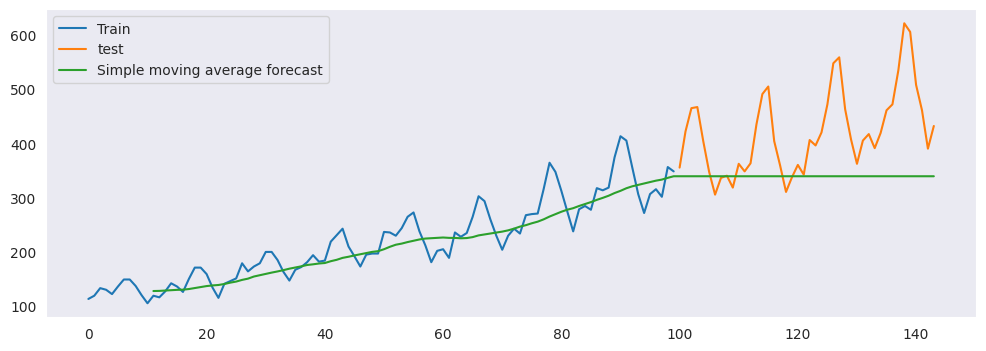

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(airline_df_train['Passengers'], label='Train')
plt.plot(airline_df_test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
# We are taking only the test data points of y_hat_sma. After the train_len data points
rmse = np.sqrt(mean_squared_error(airline_df_test['Passengers'], y_hat_sma['sma_forecast'][train_size:])).round(2)
rmse

112.16

In [ ]:
results = pd.DataFrame({'Method':['Simple moving average method'], 'RMSE':[rmse]})
results

,Method,RMSE
0,Simple moving average method,112.16


Analyssis:


*   We see far better results than the other two methods.
*   Hence the recent past average data is better to forecast the future.





Now lets try with :-

**ma_window = 6**

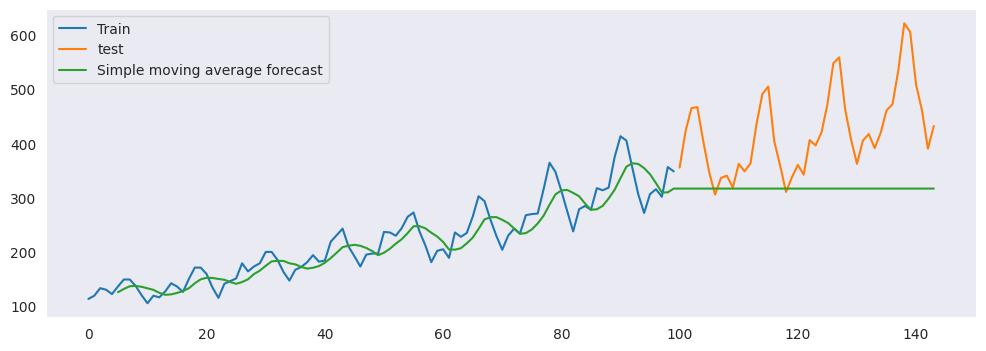

In [ ]:
ma_window = 6
y_hat_sma['sma_forecast'] = airline_df['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_size:] = y_hat_sma['sma_forecast'][train_size-1]
plt.figure(figsize=(12,4))
plt.plot(airline_df_train['Passengers'], label='Train')
plt.plot(airline_df_test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

We can see that with lower number of recent past data(6 months) average, the forecast line gets little seasonal passtern, just like the actual pattern.

This is because, now we are taking only last 6 months data to forecast, which corresponds to the similarity of the next few months.

**ma_window = 3**


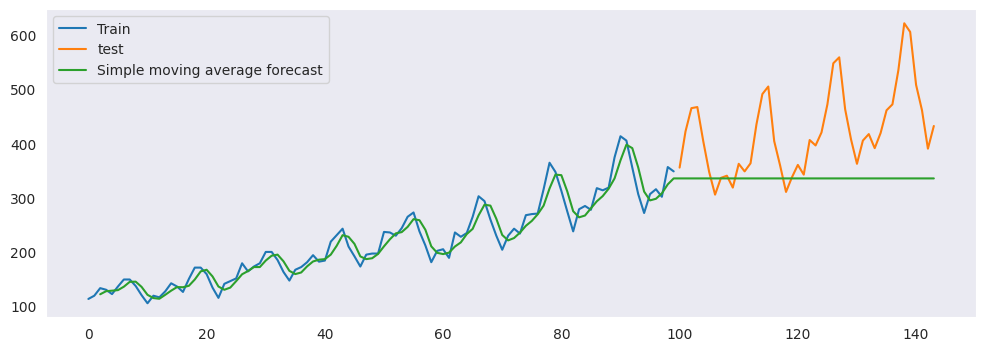

In [ ]:
ma_window = 3
y_hat_sma['sma_forecast'] = airline_df['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_size:] = y_hat_sma['sma_forecast'][train_size-1]
plt.figure(figsize=(12,4))
plt.plot(airline_df_train['Passengers'], label='Train')
plt.plot(airline_df_test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

With more lesser number of past data (3 months), the forecasted line is almost hugging to the actual line.

**Conclusion**

As we need to forecast for the longer time period for 2 or 5 years, it is better to take a moderate or reasonable amount of past data average such as 12 months.

### **2) Naive Forcasting (Baseline Model)**


Forecast = Last month’s data

Or the last data of the train set, which will be assigned to all the records of the test data.

In [ ]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = airline_df_test.copy()
y_hat_naive.head()

,Month,Passengers
100,1957-05-01,355
101,1957-06-01,422
102,1957-07-01,465
103,1957-08-01,467
104,1957-09-01,404


In [ ]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = airline_df_train['Passengers'][train_size-1]

In [ ]:
y_hat_naive.head()

,Month,Passengers,naive_forecast
100,1957-05-01,355,348
101,1957-06-01,422,348
102,1957-07-01,465,348
103,1957-08-01,467,348
104,1957-09-01,404,348


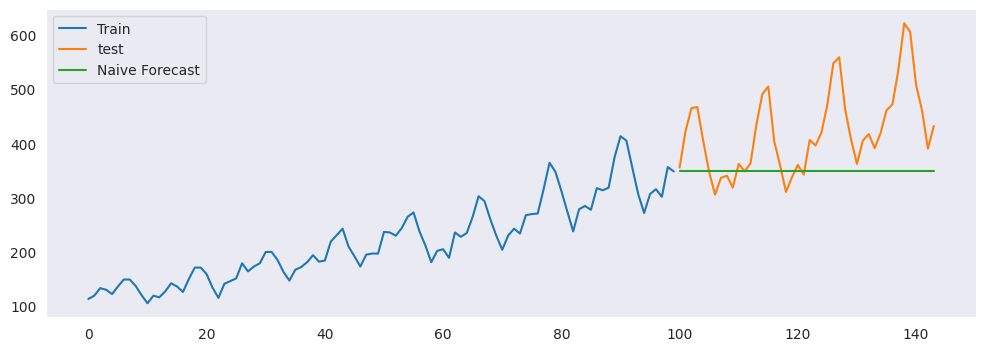

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(airline_df_train['Passengers'], label='Train')
plt.plot(airline_df_test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

Analysis:

All the values are same as we assigned all the forecasting records to the last value of the train set(Dec 1958).
The forecasting is undervalued when compared to the actual test data value.

Calculate RMSE Error

In [ ]:
from sklearn.metrics import mean_squared_error
# mean_squared_error is a sqaured term of the error
# In order to make the error comparable with the target variable, we have to take the square root of the error (RMSE)
rmse = np.sqrt(mean_squared_error(airline_df_test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

105.75

In [ ]:
results = results.append({'Method':'Naive method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple moving average method,112.16
1,Simple moving average method,112.16
2,Naive method,105.75


### **3) Weighted Moving Average**

In [ ]:
import numpy as np
y_hat_wma = airline_df.copy()
weights = np.linspace(0.1,1,9)

# Apply the weighted moving average
y_hat_wma['wma_forecast'] = y_hat_wma['Passengers'].rolling(window=len(weights), win_type=None).apply(lambda x: (x * weights).sum()/sum(weights), raw=True)
y_hat_wma['wma_forecast'][train_size:] = y_hat_wma['wma_forecast'][train_size-1]


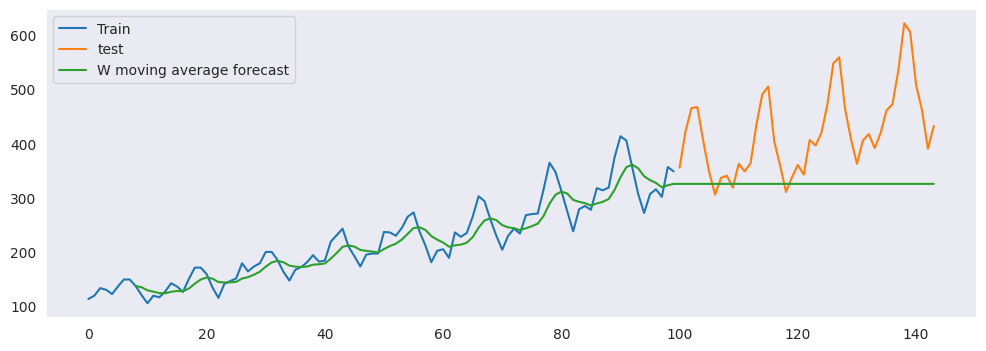

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(airline_df_train['Passengers'], label='Train')
plt.plot(airline_df_test['Passengers'], label='test')
plt.plot(y_hat_wma['wma_forecast'], label='W moving average forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(airline_df_test['Passengers'], y_hat_wma['wma_forecast'][train_size:])).round(2)
rmse

122.87

In [ ]:
results = results.append({'Method':'Weighted moving average method', 'RMSE':rmse}, ignore_index=True)
# results = results.sort_values('RMSE', ascending=True)
results

,Method,RMSE
0,Simple moving average method,112.16
1,Simple moving average method,112.16
2,Naive method,105.75
3,Weighted moving average method,122.87


### **4) Simple Linear Regression Model**

In [ ]:
import statsmodels.api as sm

# Load the dataset
# data = sm.datasets.get_rdataset("AirPassengers").data

# Convert the 'Month' column to a datetime object
# data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m-%d')

# Define the dependent and independent variables
y = airline_df['Passengers']
x = sm.add_constant(airline_df.index)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.02e-61
Time:                        02:55:06   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

### **5) Forcast Using Classical Decomposition**

In [ ]:
# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
# df['Month']= pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

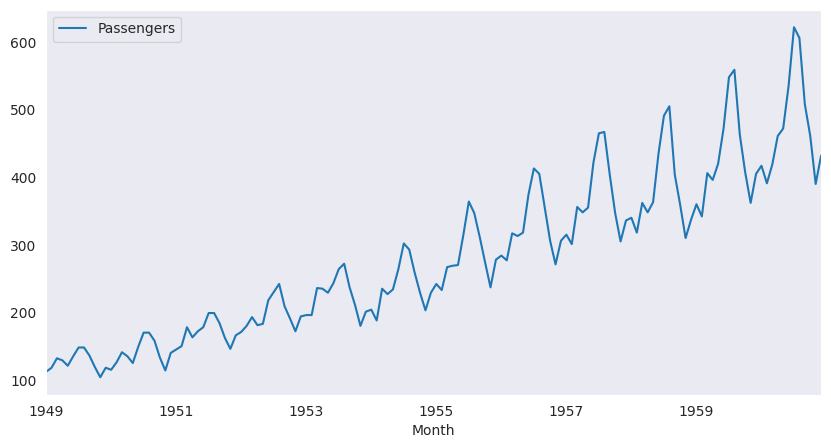

In [ ]:
# Plot time series data
df.plot(figsize=(10,5))

In [ ]:
# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df, model='additive')

<Axes: title={'center': 'Residual'}, xlabel='Month'>

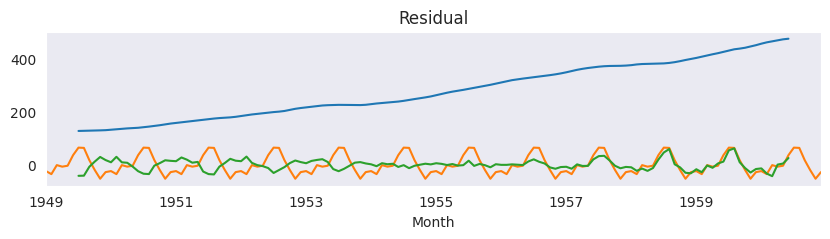

In [ ]:
# Plot decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend.plot(figsize=(10,2), title='Trend')
seasonal.plot(figsize=(10,2), title='Seasonal')
residual.plot(figsize=(10,2), title='Residual')

In [ ]:
# Use trend and seasonal components to forecast next 12 months
future_dates = pd.date_range(start='1961-01-01', periods=12, freq='MS')
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

trend_seasonal = trend + seasonal
forecast = trend_seasonal.iloc[-1] * (1 + residual.mean())
future_df['Passengers'] = forecast

<Axes: title={'center': 'Forecasted Passengers'}, xlabel='Month'>

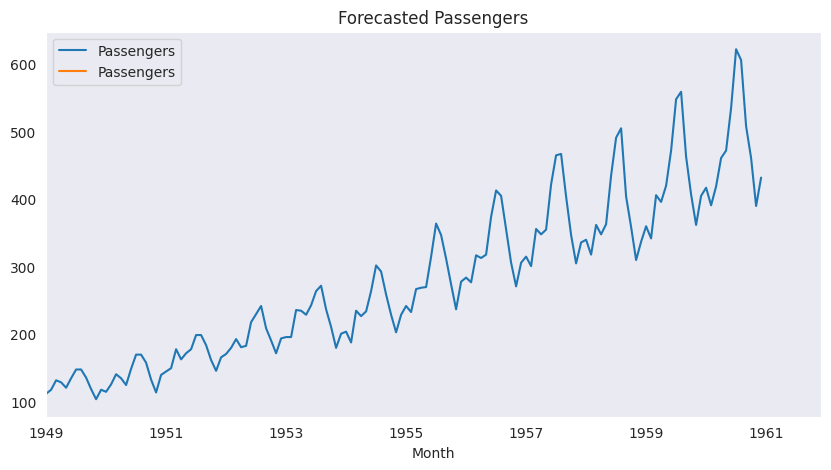

In [ ]:
# Plot forecasted values
df.plot(figsize=(10,5), title='Airline Passengers')
future_df.plot(ax=plt.gca(), figsize=(10,5), title='Forecasted Passengers')

### **6) Forcast Using STL Decomposition**

In [ ]:
# Import necessary libraries
from statsmodels.tsa.seasonal import STL

In [ ]:
# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

In [ ]:
# Apply STL decomposition
decomposition = STL(df, period=12, robust=True)
res = decomposition.fit()

<Axes: title={'center': 'Residual'}, xlabel='Month'>

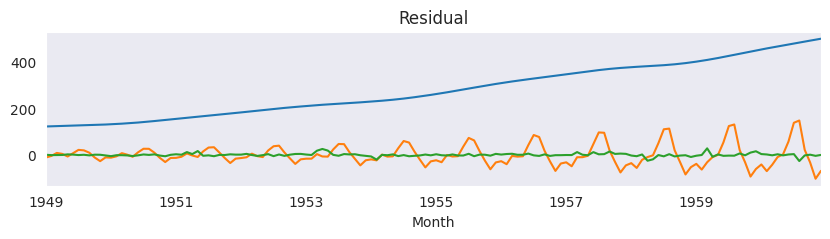

In [ ]:
# Plot decomposed components (STL)
trend = res.trend
seasonal = res.seasonal
residual = res.resid

trend.plot(figsize=(10,2), title='Trend')
seasonal.plot(figsize=(10,2), title='Seasonal')
residual.plot(figsize=(10,2), title='Residual')

We can see that the trend component obtained from the STL decomposition is smoother than the one obtained from the classical decomposition. The seasonal component is also different, with the STL method capturing more detailed variations within each seasonal cycle. Finally, the residual component shows more noise and fluctuations than in the classical decomposition.

In [ ]:
# Use trend and seasonal components to forecast next 12 months
future_dates = pd.date_range(start='1961-01-01', periods=12, freq='MS')
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

trend_seasonal = trend + seasonal
forecast = trend_seasonal.iloc[-1] + residual.mean()
future_df['Passengers'] = forecast

<Axes: title={'center': 'Forecasted Passengers'}, xlabel='Month'>

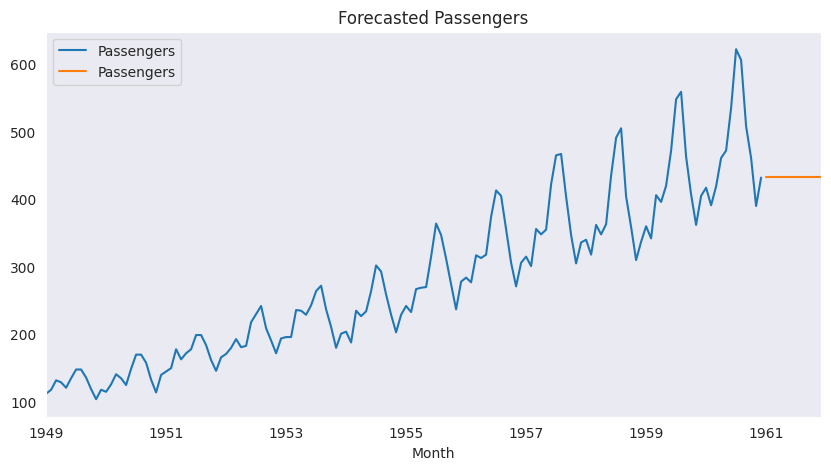

In [ ]:
# Plot forecasted values
df.plot(figsize=(10,5), title='Airline Passengers')
future_df.plot(ax=plt.gca(), figsize=(10,5), title='Forecasted Passengers')

### **7) ARIMA / S-ARIMA**

steps:
1.   Check for stationarity
2.   Plot ACF and PACF
3.   Try multiple models
4.   Evaluate using AIC and BIC
5.   Fit the best model and make predictions



#### Check for stationarity
- Histogram plot
- Summary Statistics
- Augmented Dickey-Fuller test
- Plot ACF and PACF

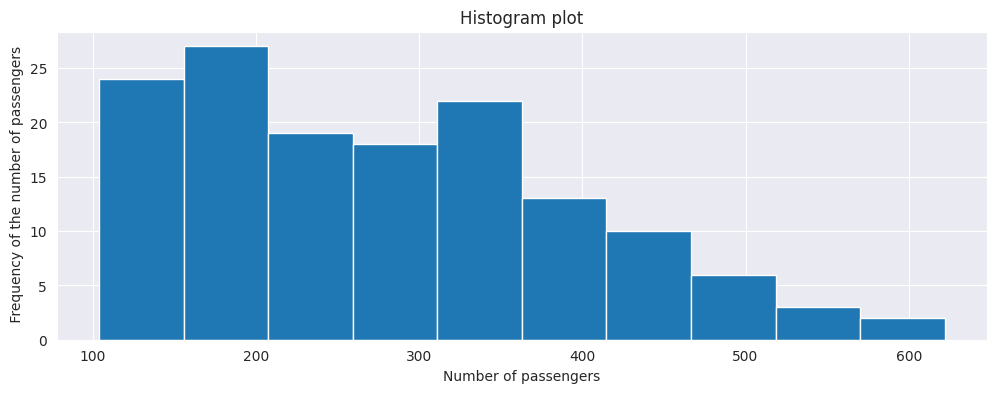

In [ ]:
airline_df['Passengers'].hist(figsize=(12,4))
plt.xlabel('Number of passengers');
plt.ylabel(' Frequency of the number of passengers');
plt.title('Histogram plot');

Not a bell curve-like shape of the Gaussian distribution. "Non-stationary"



In [ ]:
X = airline_df.Passengers.values
split = int(len(X) / 2)
X1, X2 = X[:split], X[split:]
print('mean1=%.2f, mean2=%.2f' % (X1.mean(), X2.mean()))
print('variance1=%.2f, variance2=%.2f' % (X1.var(), X2.var()))

mean1=182.90, mean2=377.69
variance1=2244.09, variance2=7367.96


The mean and variance are highly different. "Non-stationary"


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(airline_df.Passengers)

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


p-value > 0.05 so we fail to reject the Null hypothesis. So the data is non-stationariy

**Plot ACF and PCAF**

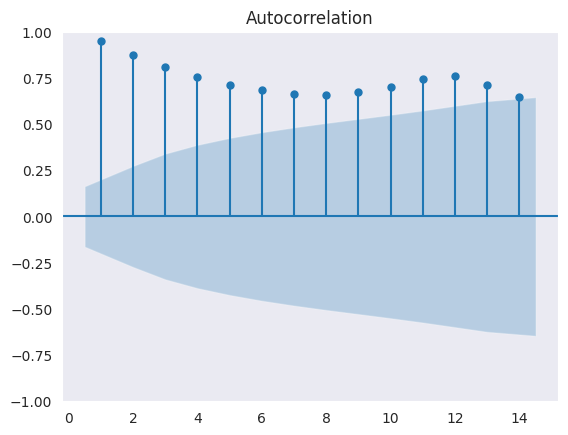

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
data = airline_df.Passengers
fig = plot_acf(data, lags=range(1,15), alpha=0.05)

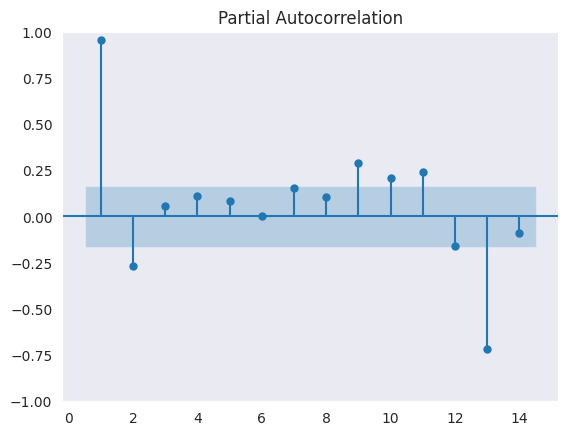

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plot_pacf(data, lags=range(1,15), alpha=0.05)

The PACF plot indicates a seasonality with lag 12 in the data
 
ACF plot indicates trend

#### Make data stationariy
1. Stationary in Variance 
2. Seasonal Stationary
3. Trend Stationary

Stationary in Variance:
We apply log transform as variability of time series data doesn’t depend on time period.

**BUT** We need to apply log transformation before differencing

In [ ]:
airline_df['log_data'] = np.log(airline_df.Passengers)

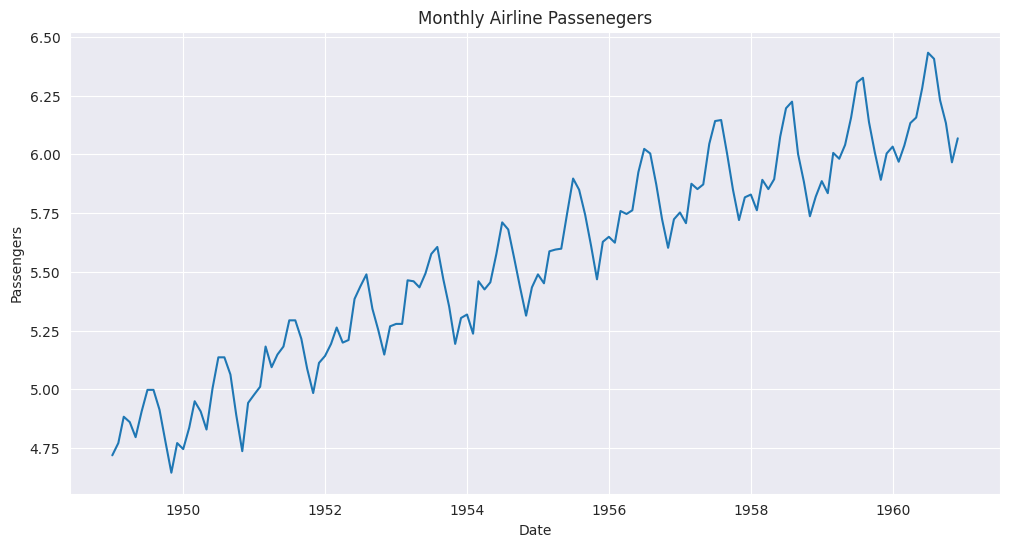

In [ ]:
plt.figure(figsize=(12,6));
plt.plot(airline_df.Month, airline_df.log_data);
plt.xlabel('Date');
plt.ylabel('Passengers');
plt.title('Monthly Airline Passenegers');
plt.grid();

**Remove Seasonality using Differencing**

We use lag 12 to remove monthly data seasonality

In [ ]:
airline_df['fd_lag_12'] = airline_df.log_data.diff(periods=12)

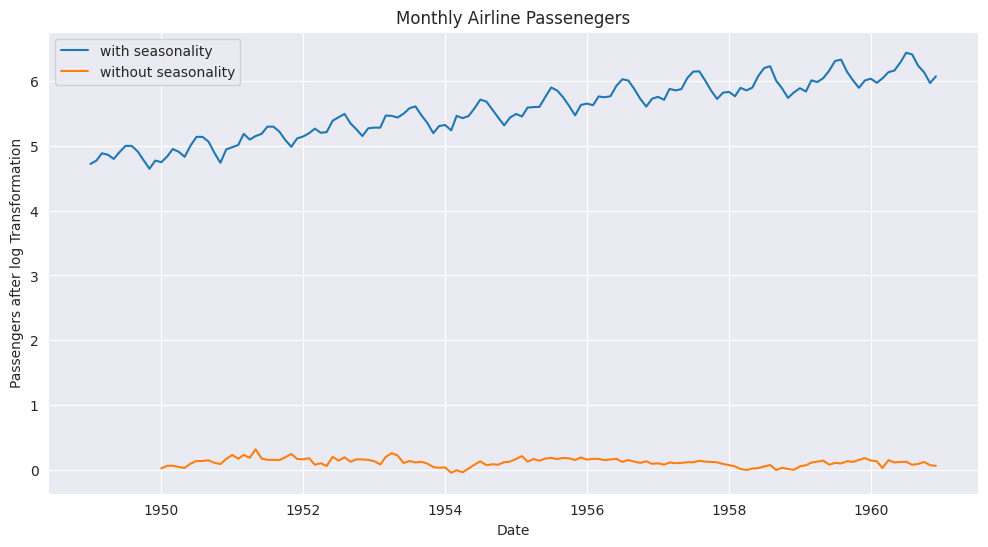

In [ ]:
plt.figure(figsize=(12,6));
plt.plot(airline_df.Month, airline_df.log_data);
plt.plot(airline_df.Month, airline_df.fd_lag_12);
plt.xlabel('Date');
plt.ylabel('Passengers after log Transformation');
plt.title('Monthly Airline Passenegers');
plt.grid();
plt.legend(['with seasonality', 'without seasonality']);

In [ ]:
# check again for stationarity
adf = adfuller(airline_df.fd_lag_12[12:])

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.709577
p-value: 0.072396
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


The data has become stationary after Deseasonalizing

So we don't need to perform 1st difference :)

**Remove Seasonality using Modeling**

We use linear regression to fit a model

Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# generate time index t
airline_df['t'] = np.arange(0, airline_df.shape[0])
model = LinearRegression()
model.fit(airline_df['t'].values.reshape(-1, 1),airline_df['log_data'].values)

LinearRegression()

In [ ]:
airline_df['fitted_curve_values'] = model.predict(airline_df['t'].values.reshape(-1, 1))
 
airline_df
airline_df['deseasonalized_model_fit'] = airline_df.log_data - airline_df.fitted_curve_values

airline_df.head()

,Month,Passengers,log_data,fd_lag_12,t,fitted_curve_values,deseasonalized_model_fit
0,1949-01-01,112,4.718499,NaN,0,4.823717,-0.105218
1,1949-02-01,118,4.770685,NaN,1,4.833765,-0.063080
2,1949-03-01,132,4.882802,NaN,2,4.843813,0.038988
3,1949-04-01,129,4.859812,NaN,3,4.853862,0.005951
4,1949-05-01,121,4.795791,NaN,4,4.863910,-0.068120


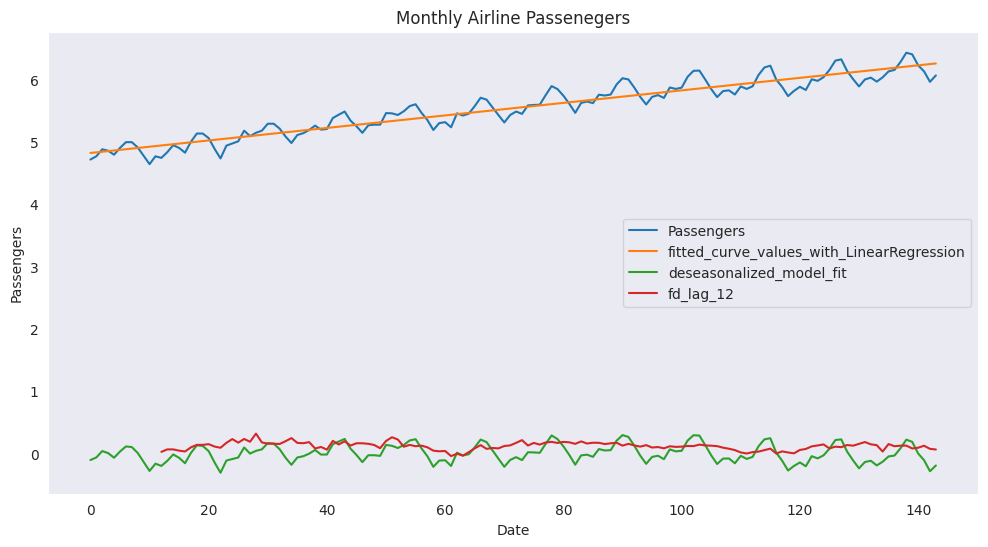

In [ ]:
plt.figure(figsize=(12,6));

plt.plot(airline_df.log_data)
plt.plot(airline_df.fitted_curve_values)
plt.plot(airline_df.deseasonalized_model_fit)
plt.plot(airline_df.fd_lag_12)
plt.xlabel('Date');
plt.ylabel('Passengers');
plt.title('Monthly Airline Passenegers');
plt.legend(['Passengers', 'fitted_curve_values_with_LinearRegression', 'deseasonalized_model_fit', 'fd_lag_12']);

Using Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
poly_feat = PolynomialFeatures(degree=10)
t_poly = poly_feat.fit_transform(airline_df['t'].values.reshape(-1, 1))

model.fit(t_poly, airline_df['log_data'].values)

LinearRegression()

In [ ]:
airline_df['fitted_curve_values_10'] = model.predict(t_poly)
airline_df['deseasonalized_model_fit_10'] = airline_df.log_data - airline_df.fitted_curve_values_10

airline_df.head()

,Month,Passengers,log_data,fd_lag_12,t,fitted_curve_values,deseasonalized_model_fit,fitted_curve_values_10,deseasonalized_model_fit_10
0,1949-01-01,112,4.718499,NaN,0,4.823717,-0.105218,4.923951,-0.205452
1,1949-02-01,118,4.770685,NaN,1,4.833765,-0.063080,4.923951,-0.153266
2,1949-03-01,132,4.882802,NaN,2,4.843813,0.038988,4.923951,-0.041149
3,1949-04-01,129,4.859812,NaN,3,4.853862,0.005951,4.923956,-0.064143
4,1949-05-01,121,4.795791,NaN,4,4.863910,-0.068120,4.923971,-0.128180


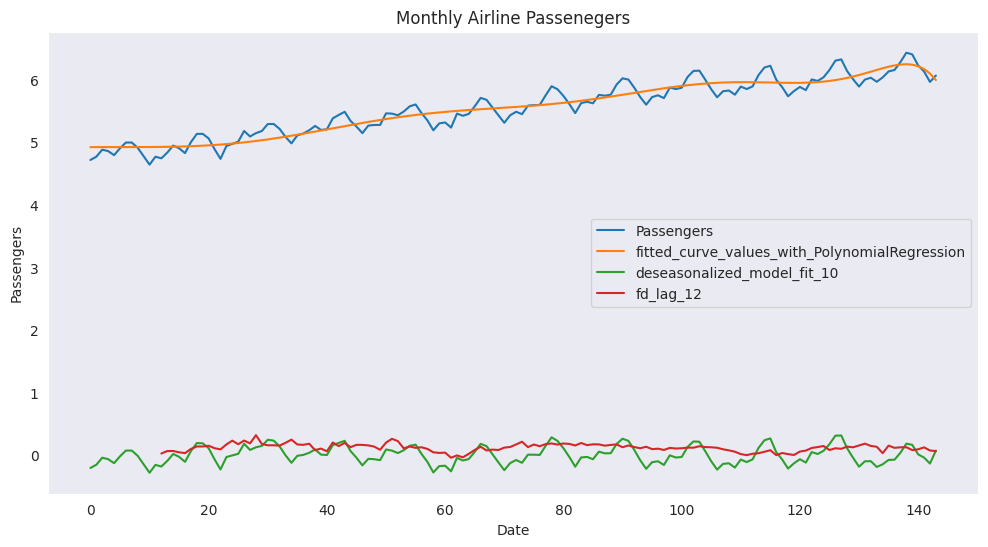

In [ ]:
plt.figure(figsize=(12,6));

plt.plot(airline_df.log_data)
plt.plot(airline_df.fitted_curve_values_10)
plt.plot(airline_df.deseasonalized_model_fit_10)
plt.plot(airline_df.fd_lag_12)
plt.xlabel('Date');
plt.ylabel('Passengers');
plt.title('Monthly Airline Passenegers');
plt.legend(['Passengers', 'fitted_curve_values_with_PolynomialRegression', 'deseasonalized_model_fit_10', 'fd_lag_12']);

We can see here that Linear regression as well as Polynomial regression failed to fit a
multiplicative seasonal data and thus failed to remove seasonality.

While differencing has worked fine at the expense of losing
information.

**Conclusion:
Using differencing with lag 12 removed seasonality and trend, thus the data became stationary**

#### Plot ACF and PCAF
to find the proper ARIMA model to use

We use first difference data in order to remove trend and determine the order of S-ARIMA parts.

In [ ]:
airline_df['fd_lag'] = airline_df.log_data.diff(periods=1)

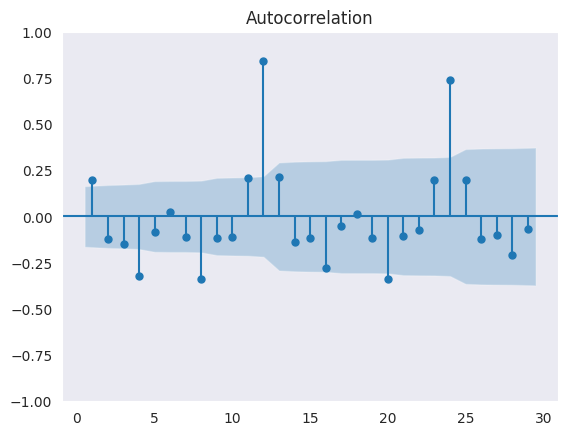

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = airline_df.fd_lag[1:]
fig = plot_acf(data, lags=range(1,30), alpha=0.05)

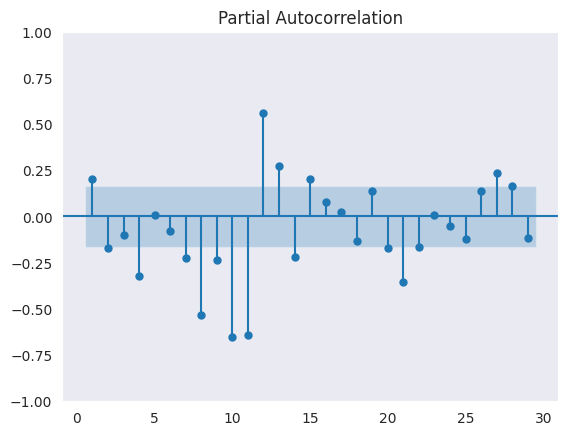

In [ ]:
fig = plot_pacf(data, lags=range(1,30), alpha=0.05)

ACF has significant column at lag 12 and 24 so we use Seasonal MA(2).

PACF has  significant column at lag 12 so we use Seasonal AR(1).

We try AR(0) and AR(1) because it did not reach 0 at AR(1)

#### Try multiple S-ARIMA Models
The Data has seasonality so we use **S-Arima** instead of Arima

Model 1:

Ar(1)

Seasonal order(1,1,2)

In [ ]:
# train test split with respect to order
airline_df_train, airline_df_test, train_size = Train_Test_Split()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model_1 = SARIMAX(endog=airline_df_train.log_data, order=(1,1,0), seasonal_order=(1,1,2,12))
model_fit_1 = model_1.fit()

# get residuals values for later study
residuals_1 = model_fit_1.resid

# summary of fit model
print(model_fit_1.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                log_data   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                 157.293
Date:                                 Fri, 07 Apr 2023   AIC                           -304.587
Time:                                         22:07:20   BIC                           -292.257
Sample:                                              0   HQIC                          -299.622
                                                 - 100                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3284      0.089     -3.703      0.000      -0.502      -0

In [ ]:
def calc_RMSE(data, predictions):
    return mean_squared_error(data, np.exp(predictions), squared=False)

In [ ]:
def make_predictions(model, train_data, test_data):
    train_predictions = model.predict() # predict train data (insample only)
    test_predictions = model.forecast(steps=test_data.log_data.shape[0])
    print("Train RMSE %.2f" % calc_RMSE(train_data.Passengers, train_predictions))
    print("Test RMSE %.2f" % calc_RMSE(test_data.Passengers, test_predictions))

In [ ]:
make_predictions(model_fit_1, airline_df_train, airline_df_test)

Train RMSE 114.27
Test RMSE 39.16


Model 2:

Ar(0)

Seasonal order(1,1,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model_2 = SARIMAX(endog=airline_df_train.log_data, order=(0,1,0), seasonal_order=(1,1,2,12))
model_fit_2 = model_2.fit()

# get residuals values for later study
residuals_2 = model_fit_2.resid

# summary of fit model
print(model_fit_2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                log_data   No. Observations:                  100
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                 152.419
Date:                                 Fri, 07 Apr 2023   AIC                           -296.838
Time:                                         22:07:21   BIC                           -286.974
Sample:                                              0   HQIC                          -292.866
                                                 - 100                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3963      5.416     -0.073      0.942     -11.012      10

In [ ]:
make_predictions(model_fit_2, airline_df_train, airline_df_test)

Train RMSE 114.30
Test RMSE 37.72


In [ ]:
pd.DataFrame(residuals_2).describe()

,0
count,100.000000
mean,0.025484
std,0.533159
min,-2.385002
25%,-0.024419
50%,-0.000079
75%,0.039271
max,4.718499


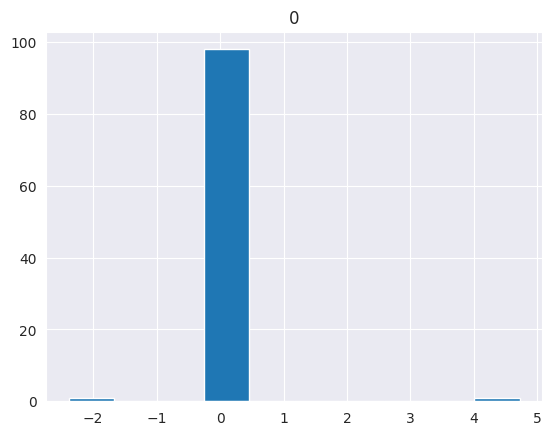

In [ ]:
pd.DataFrame(residuals_2).hist();

We notice that non seasonal Ar(0) is higher RMSE and lower AIC

Model 3:

Ar(0)

Seasonal order(1,0,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model_3 = SARIMAX(endog=airline_df_train.log_data, order=(0,1,0), seasonal_order=(1,1,1,12))
model_fit_3 = model_3.fit()

# get residuals values for later study
residuals_3 = model_fit_3.resid

# summary of fit model
print(model_fit_3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             log_data   No. Observations:                  100
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 152.398
Date:                              Fri, 07 Apr 2023   AIC                           -298.795
Time:                                      22:12:19   BIC                           -291.398
Sample:                                           0   HQIC                          -295.817
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0004      0.202     -0.002      0.998      -0.397       0.396
ma.S.L12      -0.64

In [ ]:
make_predictions(model_fit_3, airline_df_train, airline_df_test)

Train RMSE 114.30
Test RMSE 37.84


#####**Best model**

S-Arima: order=(0,1,0), seasonal_order=(1,1,2,12)

RMSE = 37.72 and AIC = -296.838

##### Apply different data splits on best model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Cross Validation

In [ ]:
# train test split with respect to order
X = airline_df.log_data.values
X_passengers = airline_df.Passengers.values

Cross_Validation_Data = Cross_Validation(3,None,None)
cun_RMSE = []
for train_index, test_index in Cross_Validation_Data:
    train = X[train_index]
    test = X[test_index]
    
    model = SARIMAX(endog=train, order=(1,1,0), seasonal_order=(1,1,2,12))
    model_fit = model.fit()

    train_predictions = model_fit.predict() # predict train data (insample only)
    test_predictions = model_fit.forecast(steps=test.shape[0])

    rmse = calc_RMSE(X_passengers[test_index], test_predictions)
    cun_RMSE.append(rmse)

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print("Test RMSE %.2f" % rmse)
    print()

Observations: 72
Training Observations: 36
Testing Observations: 36
Test RMSE 16.73

Observations: 108
Training Observations: 72
Testing Observations: 36
Test RMSE 28.61

Observations: 144
Training Observations: 108
Testing Observations: 36
Test RMSE 32.65



In [ ]:
print("Average RMSE %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE 26.00


Roll-forward

In [ ]:
# train test split with respect to order
X = airline_df.log_data.values
X_passengers = airline_df.Passengers.values

Roll_Forward_Data = Roll_Forward(20,1)
cun_RMSE = []
for train_index, test_index in Roll_Forward_Data:
    train = X[train_index]
    test = X[test_index]
    
    model = SARIMAX(endog=train, order=(1,1,0), seasonal_order=(1,1,2,12))
    model_fit = model.fit()

    train_predictions = model_fit.predict() # predict train data (insample only)
    test_predictions = model_fit.forecast(steps=test.shape[0])
    
    rmse = calc_RMSE(X_passengers[test_index], test_predictions)
    cun_RMSE.append(rmse)

    print('train=%d, test=%d' % (len(train), len(test)))
    print("Test RMSE %.2f" % rmse)
    print()


train=124, test=1
Test RMSE 13.49

train=125, test=1
Test RMSE 19.64

train=126, test=1
Test RMSE 9.90

train=127, test=1
Test RMSE 20.31

train=128, test=1
Test RMSE 6.10

train=129, test=1
Test RMSE 0.56

train=130, test=1
Test RMSE 7.44

train=131, test=1
Test RMSE 6.86

train=132, test=1
Test RMSE 2.94

train=133, test=1
Test RMSE 6.64

train=134, test=1
Test RMSE 39.70

train=135, test=1
Test RMSE 42.05

train=136, test=1
Test RMSE 6.81

train=137, test=1
Test RMSE 26.24

train=138, test=1
Test RMSE 9.12

train=139, test=1
Test RMSE 19.88

train=140, test=1
Test RMSE 4.20

train=141, test=1
Test RMSE 15.88

train=142, test=1
Test RMSE 10.59

train=143, test=1
Test RMSE 6.88



In [ ]:
print("Average RMSE %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE 13.76


####**Conclusion**

The best model is S-Arima model with 1 seasonal difference, first difference, S-AR(1) and S-MA(2)

using Roll-forward split

S-Arima: order=(0,1,0), seasonal_order=(1,1,2,12)

RMSE = 13.76

### **8) Exponential Smoothing**


Exponential smoothing is a forecasting method that uses weighted averages of past observations with exponentially decreasing weights. It can model trends and seasonal components in time series data, and is referred to as an ETS model. In contrast to the moving average method, exponential smoothing does not assume equal weighting for past observations, **and saves memory and is faster than ARIMA**.

There are three key exponential smoothing techniques we gonna try :

*   Single Exponential Smoothing - no trend or seasonality
*   Double Exponential Smoothing - captures trend
*   Triple Exponential Smoothing - captures trend & seasonalit

#####**Simple train test split**

In [ ]:
airline_train_df, airline_test_df, train_size = Train_Test_Split(0.8)
airline_train_df = airline_train_df.Passengers
airline_test_df = airline_test_df.Passengers
len(airline_train_df)

115

We use this split in all modeles as a start

####**Evaluation metrics**


In [ ]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

####**Single Exponential**


*   This method works with just stationary time series.




In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

## optimize the smoothing value 
single = SimpleExpSmoothing(airline_train_df).fit(optimized=True)
single_preds = single.forecast(len(airline_test_df))

## set the smoothing value manually 
single_not_optimized = SimpleExpSmoothing(airline_train_df).fit(optimized=False, smoothing_level=0.2)
single_preds_not_optimized = single.forecast(len(airline_test_df))

## calculate the mean square error for both models 
rmse_optimized = rmse(airline_test_df,single_preds)
rmse_not_optimized = rmse(airline_test_df,single_preds_not_optimized)



print("RMSE for UN optimized model  ==", rmse_not_optimized)
print("*"*50)
print("RMSE for optimized model  ==", rmse_optimized)
print("Smoothing level == ", single.model.params["smoothing_level"])
print("*"*50)

RMSE for UN optimized model  == 92.98086667646439
**************************************************
RMSE for optimized model  == 92.98086667646439
Smoothing level ==  0.995
**************************************************


**Smoothing level value FROM OPTIMIZED MODEL indicates that we care about current value than the history of forcasting**

**Manually and Optimized smoothing value give the same RMSE**

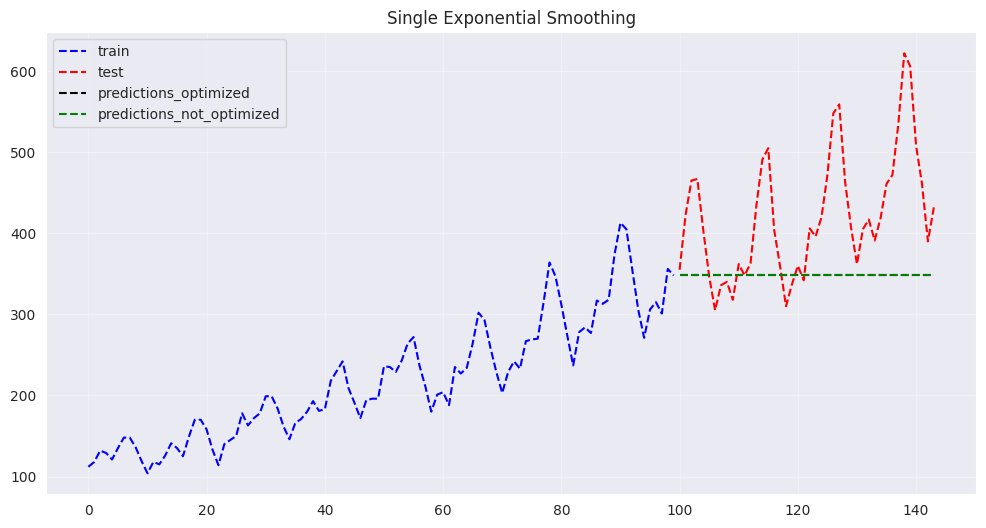

In [ ]:
plt.figure(figsize=(12,6));

plt.plot( airline_train_df, 'b--', label="train")
plt.plot( airline_test_df, 'r--', label="test")
plt.plot( single_preds, "k--", label="predictions_optimized")
plt.plot(single_preds_not_optimized, "g--", label="predictions_not_optimized")

plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

**from the plot above we can see that Single Exponential cannot catch nither trend nor sesonality**

#####Cross Validation

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Cross_Validation_Data = Cross_Validation(3,None,None)
cun_RMSE_opt = []
cun_RMSE_not_opt = []

for train_index, test_index in Cross_Validation_Data:
  train = X[train_index]
  test = X[test_index]

  single = SimpleExpSmoothing(train).fit(optimized=True)
  single_preds = single.forecast(len(test))

  ## set the smoothing value manually 
  single_not_optimized = SimpleExpSmoothing(train).fit(optimized=False, smoothing_level=0.2)
  single_preds_not_optimized = single.forecast(len(test))

  ## calculate the mean square error for both models 
  rmse_optimized = rmse(test, single_preds)
  rmse_not_optimized = rmse(test, single_preds_not_optimized)

  cun_RMSE_opt.append(rmse_optimized)
  cun_RMSE_not_opt.append(rmse_not_optimized)

  print("RMSE for UN optimized model  ==", rmse_not_optimized)
  print("*"*50)
  print("RMSE for optimized model  ==", rmse_optimized)
  print("Smoothing level == ", single.model.params["smoothing_level"])
  print("*"*50)
  print()

RMSE for UN optimized model  == 63.517058331720484
**************************************************
RMSE for optimized model  == 63.517058331720484
Smoothing level ==  0.999999985062064
**************************************************

RMSE for UN optimized model  == 114.18162952198074
**************************************************
RMSE for optimized model  == 114.18162952198074
Smoothing level ==  0.9999999850988005
**************************************************

RMSE for UN optimized model  == 121.25616965146189
**************************************************
RMSE for optimized model  == 121.25616965146189
Smoothing level ==  0.995
**************************************************



In [ ]:
print("Average RMSE for optmized %.2f" % (sum(cun_RMSE_opt)/ len(cun_RMSE_opt)))
print("Average RMSE for not optmized %.2f" % (sum(cun_RMSE_not_opt)/ len(cun_RMSE_not_opt)))

Average RMSE for optmized 99.65
Average RMSE for not optmized 99.65


#####Roll-forward

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Roll_Forward_Data = Roll_Forward(20,1)
cun_RMSE_opt = []
cun_RMSE_not_opt = []

for train_index, test_index in Roll_Forward_Data:
  train = X[train_index]
  test = X[test_index]

  single = SimpleExpSmoothing(train).fit(optimized=True)
  single_preds = single.forecast(len(test))

  ## set the smoothing value manually 
  single_not_optimized = SimpleExpSmoothing(train).fit(optimized=False, smoothing_level=0.2)
  single_preds_not_optimized = single.forecast(len(test))

  ## calculate the mean square error for both models 
  rmse_optimized = rmse(test, single_preds)
  rmse_not_optimized = rmse(test, single_preds_not_optimized)

  cun_RMSE_opt.append(rmse_optimized)
  cun_RMSE_not_opt.append(rmse_not_optimized)

  print("RMSE for UN optimized model  ==", rmse_not_optimized)
  print("*"*50)
  print("RMSE for optimized model  ==", rmse_optimized)
  print("Smoothing level == ", single.model.params["smoothing_level"])
  print("*"*50)
  print()

RMSE for UN optimized model  == 23.999999850955533
**************************************************
RMSE for optimized model  == 23.999999850955533
Smoothing level ==  0.999999985095551
**************************************************

RMSE for UN optimized model  == 52.1197579888223
**************************************************
RMSE for optimized model  == 52.1197579888223
Smoothing level ==  0.995
**************************************************

RMSE for UN optimized model  == 76.26059878994414
**************************************************
RMSE for optimized model  == 76.26059878994414
Smoothing level ==  0.995
**************************************************

RMSE for UN optimized model  == 11.381302993949703
**************************************************
RMSE for optimized model  == 11.381302993949703
Smoothing level ==  0.995
**************************************************

RMSE for UN optimized model  == 95.94309348503032
********************************

In [ ]:
print("Average RMSE for optmized %.2f" % (sum(cun_RMSE_opt)/ len(cun_RMSE_opt)))
print("Average RMSE for not optmized %.2f" % (sum(cun_RMSE_not_opt)/ len(cun_RMSE_not_opt)))

Average RMSE for optmized 47.36
Average RMSE for not optmized 47.36


####**Double Exponential**


*   This method works with **stationary and trend** time series.




In [ ]:
len(airline_train_df)

115

In [ ]:
from statsmodels.tsa.api import Holt

## linear  TREND || optimized 
double_linear = Holt(airline_train_df).fit(optimized=True)
double_preds_linear = double_linear.forecast(airline_test_df.shape[0])

## exp TREND || optimized 
double_exp = Holt(airline_train_df,exponential=True).fit(optimized=True)
double_preds_exp = double_exp.forecast(airline_test_df.shape[0])

#  damped trend ||additive || optimized 
double_damp = Holt(airline_train_df,damped_trend=True).fit(optimized=True)
double_preds_damp = double_damp.forecast(airline_test_df.shape[0])

# damped and exp trend ||multiplicative  || optimized 
double_exp_dam = Holt(airline_train_df,exponential=True, damped_trend=True).fit(optimized=True)
double_preds_exp_dam = double_exp_dam.forecast(airline_test_df.shape[0])



## CALCULATE ROOT MEAN SQUARE ERROR FOR each MODEL 
rmse_linear = rmse(airline_test_df,double_preds_linear)
rmse_exp = rmse(airline_test_df,double_preds_exp)
rmse_damp = rmse(airline_test_df,double_preds_damp)
rmse_damp_exp = rmse(airline_test_df,double_preds_exp_dam)

params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",
]
results = pd.DataFrame(
    index=["smoothing_level", "smoothing_trend", "damping_trend", "initial_level", "initial_trend", "RMSE"],
    columns=[ "linear", "Exponential", "Additive", "Multiplicative"],
)
results["linear"] = [double_exp.params[p] for p in params] + [rmse_linear]
results["Exponential"] = [double_exp.params[p] for p in params] + [rmse_exp]
results["Additive"] = [double_damp.params[p] for p in params] + [rmse_damp]
results["Multiplicative"] = [double_exp_dam.params[p] for p in params] + [rmse_damp_exp]
results

,linear,Exponential,Additive,Multiplicative
smoothing_level,0.989148,0.989148,0.995056,0.995000
smoothing_trend,0.027415,0.027415,0.000099,0.000100
damping_trend,NaN,NaN,0.990056,0.990000
initial_level,110.876656,110.876656,111.868107,112.000000
initial_trend,0.988658,0.988658,4.220394,1.063658
RMSE,124.269535,255.483974,101.182965,221.852633


**from the RMSE values it's obvious that Additive trend model has the least RMSE**



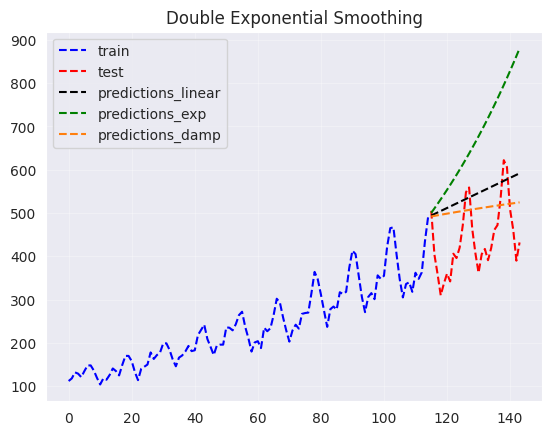

In [ ]:
plt.plot(airline_train_df, 'b--', label="train")
plt.plot(airline_test_df, 'r--', label="test")
plt.plot(double_preds_linear, "k--", label="predictions_linear")
plt.plot(double_preds_exp, "g--", label="predictions_exp")
plt.plot(double_preds_damp, "C1--" , label="predictions_damp")


plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

we found that :
1.   RMSE is less than the RMSE of single exp
2.   the double exp can catch the trend but cannot catch the seasonality

So we try different splits on Additive Trend model

#####Cross Validation

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Cross_Validation_Data = Cross_Validation(3,None,None)
cun_RMSE = []

for train_index, test_index in Cross_Validation_Data:
  train = X[train_index]
  test = X[test_index]

  #  damped trend ||additive || optimized 
  double_damp = Holt(train,damped_trend=True).fit(optimized=True)
  double_preds_damp = double_damp.forecast(test.shape[0])


  ## calculate the mean square error
  rmse_damp = rmse(test,double_preds_damp)

  cun_RMSE.append(rmse_damp)

  print("Additive trend model")
  print("RMSE ", rmse_damp)
  print()

Additive trend model
RMSE  63.50709639880337

Additive trend model
RMSE  98.96374790036313

Additive trend model
RMSE  109.65363244029784



In [ ]:
print("Average RMSE  %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE  90.71


#####Roll-forward

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Roll_Forward_Data = Roll_Forward(20,1)
cun_RMSE = []

for train_index, test_index in Roll_Forward_Data:
  train = X[train_index]
  test = X[test_index]

  #  damped trend ||additive || optimized 
  double_damp = Holt(train,damped_trend=True).fit(optimized=True)
  double_preds_damp = double_damp.forecast(test.shape[0])


  ## calculate the mean square error
  rmse_damp = rmse(test,double_preds_damp)

  cun_RMSE.append(rmse_damp)

  print("Additive trend model")
  print("RMSE ", rmse_damp)
  print()

Additive trend model
RMSE  23.188303959417908

Additive trend model
RMSE  51.04560871148311

Additive trend model
RMSE  74.91348209935603

Additive trend model
RMSE  8.963860062760773

Additive trend model
RMSE  97.60303540189875

Additive trend model
RMSE  57.67154017206184

Additive trend model
RMSE  46.54740908528555

Additive trend model
RMSE  42.35042151146325

Additive trend model
RMSE  10.634884222900496

Additive trend model
RMSE  27.503192296853683

Additive trend model
RMSE  27.86673656699236

Additive trend model
RMSE  41.155043566201016

Additive trend model
RMSE  10.296828266070577

Additive trend model
RMSE  61.54857814974025

Additive trend model
RMSE  86.2489747581044

Additive trend model
RMSE  17.05539093512664

Additive trend model
RMSE  99.55322715842658

Additive trend model
RMSE  48.9412303468643

Additive trend model
RMSE  72.66891476480043

Additive trend model
RMSE  41.00987385438361



In [ ]:
print("Average RMSE  %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE  47.34


####**Triple Exponential**

*   This method works with the time series that are stationary, seasonality and trend.


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
## ADDIRIVE TREND and SEASONALITY 
triple_add = ExponentialSmoothing(airline_train_df,
                              trend="add",
                              seasonal="add",
                              seasonal_periods=12).fit()
triple_preds_add = triple_add.forecast(len(airline_test_df))

## MULTIPLICATIVE TREND and SEASONALITY 
triple_mul = ExponentialSmoothing(airline_train_df,
                              trend="mul",
                              seasonal="mul",
                              seasonal_periods=12).fit()
triple_preds_mul = triple_mul.forecast(len(airline_test_df))

#Calculate mse for both models
rmse_triple_add = rmse(airline_test_df,triple_preds_add)
rmse_triple_mul = rmse(airline_test_df,triple_preds_mul)

#print("predicted values:\n",triple_preds )
print("RMSE of ADDITIVE TREND and SEASONALITY  ==", rmse_triple_add)
print("*"*50)
print("RMSE of MULTIPLICATIVE TREND and SEASONALITY  ==", rmse_triple_mul)

RMSE of ADDITIVE TREND and SEASONALITY  == 39.26061311965583
**************************************************
RMSE of MULTIPLICATIVE TREND and SEASONALITY  == 21.33839602611632


**From the results above multiplicative trend and seasonality is better than additive**



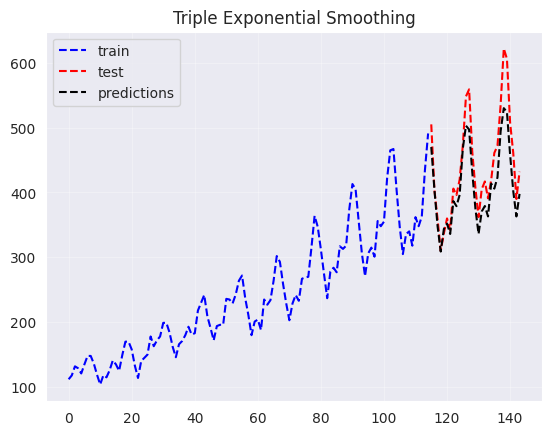

In [ ]:
plt.plot(airline_train_df, 'b--', label="train")
plt.plot(airline_test_df, 'r--', label="test")
plt.plot(triple_preds_add, "k--", label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

**We can see that triple got the least mse and catched both trend and sesonality**

#####Cross Validation

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Cross_Validation_Data = Cross_Validation(3,None,None)
cun_RMSE = []

for train_index, test_index in Cross_Validation_Data:
  train = X[train_index]
  test = X[test_index]

  ## MULTIPLICATIVE TREND and SEASONALITY 
  triple_mul = ExponentialSmoothing(train,
                                trend="mul",
                                seasonal="mul",
                                seasonal_periods=12).fit()
  triple_preds_mul = triple_mul.forecast(len(test))


  ## calculate the mean square error
  rmse_triple_mul = rmse(test,triple_preds_mul)

  cun_RMSE.append(rmse_triple_mul)

  print("Additive trend model")
  print("RMSE ", rmse_triple_mul)
  print()

Additive trend model
RMSE  19.797332821176198

Additive trend model
RMSE  26.535100120535446

Additive trend model
RMSE  59.3795611352333



In [ ]:
print("Average RMSE  %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE  35.24


#####Roll-forward

In [ ]:
# train test split with respect to order
X = airline_df.Passengers.values

Roll_Forward_Data = Roll_Forward(20,1)
cun_RMSE = []

for train_index, test_index in Roll_Forward_Data:
  train = X[train_index]
  test = X[test_index]

  ## MULTIPLICATIVE TREND and SEASONALITY 
  triple_mul = ExponentialSmoothing(train,
                                trend="mul",
                                seasonal="mul",
                                seasonal_periods=12).fit()
  triple_preds_mul = triple_mul.forecast(len(test))


  ## calculate the mean square error
  rmse_triple_mul = rmse(test,triple_preds_mul)

  cun_RMSE.append(rmse_triple_mul)

  print("Additive trend model")
  print("RMSE ", rmse_triple_mul)
  print()

Additive trend model
RMSE  4.332539078794355

Additive trend model
RMSE  28.143353036584074

Additive trend model
RMSE  3.3610467685346066

Additive trend model
RMSE  8.757733142074358

Additive trend model
RMSE  12.483581214676008

Additive trend model
RMSE  3.7459278738911053

Additive trend model
RMSE  10.636688338295869

Additive trend model
RMSE  13.670070386420093

Additive trend model
RMSE  3.9077874610525214

Additive trend model
RMSE  6.648413723812155

Additive trend model
RMSE  46.387360388779314

Additive trend model
RMSE  24.230695996993404

Additive trend model
RMSE  2.549648656992076

Additive trend model
RMSE  5.325060202904183

Additive trend model
RMSE  0.10451681178562922

Additive trend model
RMSE  25.969901416906055

Additive trend model
RMSE  4.034525541435755

Additive trend model
RMSE  13.16166038611226

Additive trend model
RMSE  7.529785203986421

Additive trend model
RMSE  5.316239185604616



In [ ]:
print("Average RMSE  %.2f" % (sum(cun_RMSE)/ len(cun_RMSE)))

Average RMSE  11.51


####**Conclusion**

The best model is Multiplicative Triple Trend model using Roll-forward split

RMSE = 11.51

Note: This model is better than S-Arima that has RMSE = 13.76


### **9) Facebook Prophet Algorithm**
https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a

**We can see that triple got the least mse and catched both trend and sesonality**



*   Prophet works through use of an additive model whereby the non-linear trends in the series are fitted with the appropriate seasonality (whether daily, weekly, or yearly).

*   It is designed to be robust to use and to handle seasonal trends and holidays well, shifts in the trend, and typically handles outliers wellList item



*   Prophet uses a generalized additive model, a type of regression model, to make predictions. It can accomodate non-linear smoothers applied ot the regressors.

*   The model is decomposable into trend, seasonality, and holiday components.



*   Prophet is curve-fitting instead of a model class like ARIMA that explicitly accounts for the temporal component of the model through autoregression.

*   Prophet can accomodate expert information, so it's Bayesian-friendly.



*   It works best with time series that have strong seasonal effects and several seasons of historical data.
















**Advantages of Prophet**
1. Very fast - Prophet is very fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.

Facebook Prophet is an open-source algorithm for generating time-series models that uses a few old ideas with some new twists. It is particularly good at modeling time series that have multiple seasonalities and doesn’t face some of the above drawbacks of other algorithms. At its core is the sum of three functions of time plus an error term: growthg(t), seasonality s(t), holidays h(t) , and error e_t :


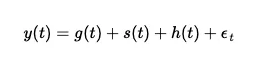

#### **Installation of Prophet**

In [24]:
# https://github.com/facebook/prophet/issues/2052
!pip uninstall fbprophet
!pip install cmdstanpy==0.9.68
!pip install pystan==2.19.1.1
!pip install prophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.68 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61

In [25]:
from fbprophet import Prophet

#### **Preview dataset**

**Python API**

* Prophet follows the sklearn model API.

* First up, we create an instance of the Prophet class and then call its fit and predict methods.

* The input to Prophet is always a dataframe with two columns - ds and y.

* The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The y column must be numeric, and represents the measurement we wish to forecast

In [26]:
# create a copy of the DataFrame
airline_df_copy = airline_df.copy()

# change the column names of the copy
airline_df_copy.columns = ['ds', 'y']

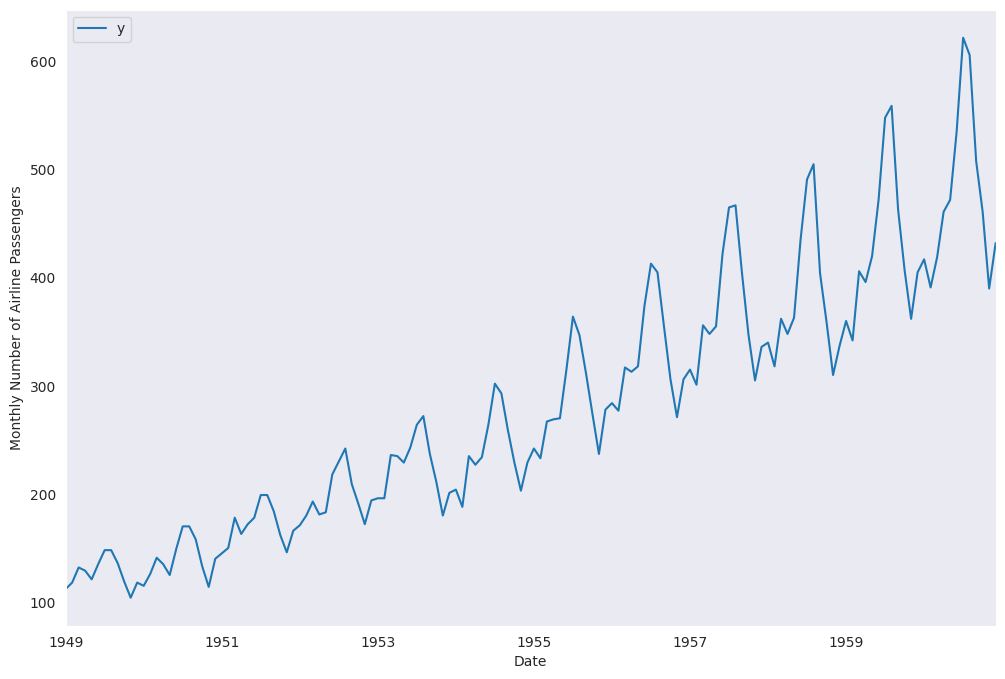

In [27]:
ax = airline_df_copy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

#### **Forecasting with Prophet**

Facebook Prophet operates similarly to scikit-learn, so first we instantiate the model, then call .fit(ts) passing the time series through it.

* Now, we will describe how to use the Prophet library to predict future values of our time series data.

* The developers of Prophet have made it more intuitive for analysts and developers alike to work with time series data.

* To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [28]:
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(airline_df_copy)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions.

* Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function.

In [29]:
# This method outputs an empty pandas dataframe that we will fill with the forecast using the .predict(ts)method.
future = prophet_model.make_future_dataframe(periods=36, freq='MS')
future.tail(5)

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


* In the code snippet above, we instructed Prophet to generate 36 datestamps in the future.
When working with Prophet, it is important to consider the frequency of our time series.

* Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month).

* Therefore, the make_future_dataframe generated 36 monthly timestamps for us.

* In other words, we are looking to predict future values of our time series 3 years into the future.

* The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [30]:
forecast = prophet_model.predict(future)

In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,85.926335,38.437174,131.209810
1,1949-02-01,79.435289,33.075849,121.489174
2,1949-03-01,111.024591,63.229818,154.622450
3,1949-04-01,108.590910,64.318014,150.790060
4,1949-05-01,111.944265,67.533508,150.997018


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts
* A variation in values from the output presented is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts.

* MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts as follows:

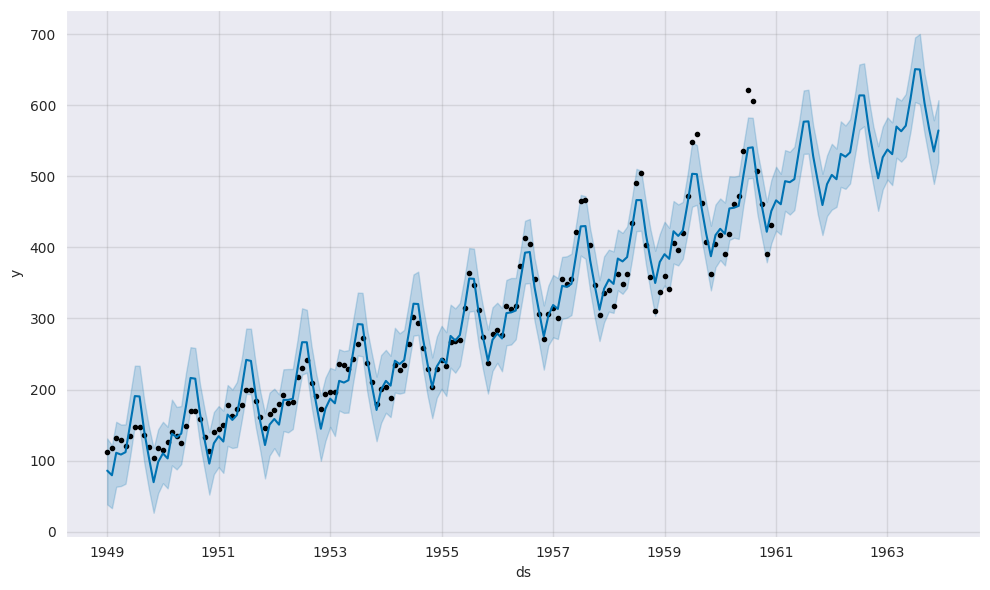

In [33]:
# Python
fig1 = prophet_model.plot(forecast,uncertainty=True)

* Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

* One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

* This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

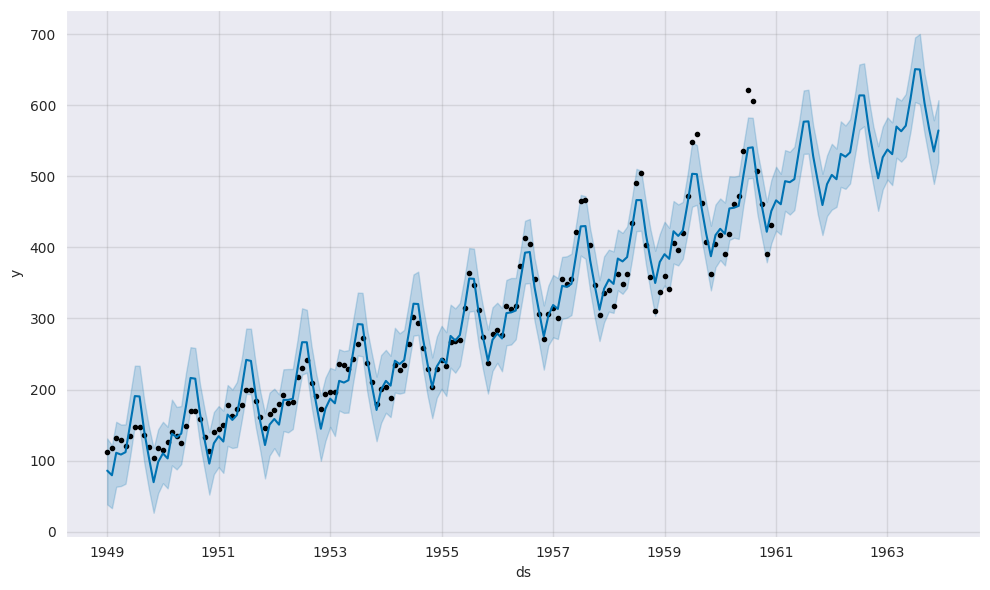

In [34]:
# Python
fig1 = prophet_model.plot(forecast)

* The above plot provides interesting insights.

* The first plot shows that the monthly volume of airline passengers has been linearly increasing over time.

* The second plot highlights the fact that the weekly count of passengers peaks towards the end of the week and on Saturday.

* The third plot shows that the most traffic occurs during the holiday months of July and August.

#### **Plotting the forecasted components**

We can plot the trend and seasonality, components of the forecast as follows:

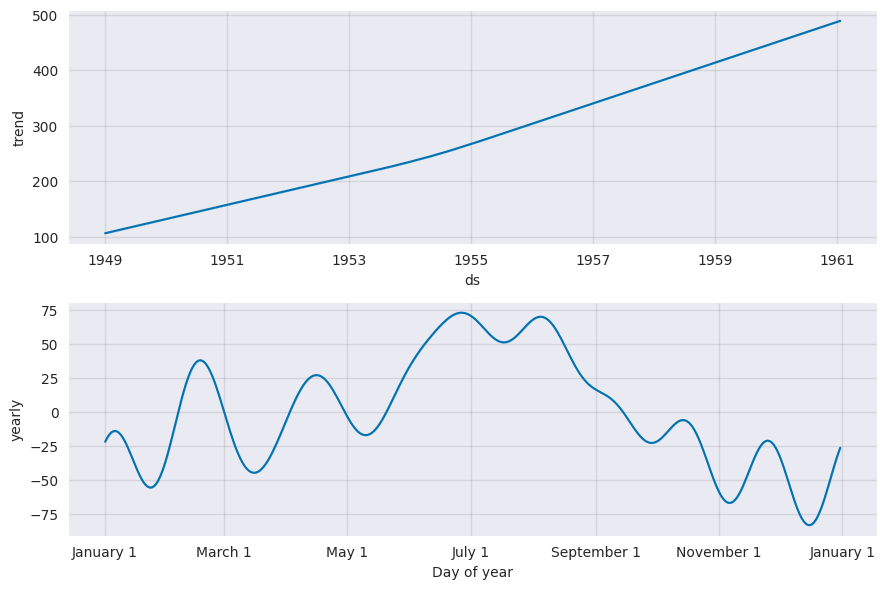

In [ ]:
fig2 = prophet_model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet_model, forecast)

In [ ]:
plot_components_plotly(prophet_model, forecast)

#### **Adding ChangePoints to Prophet**

* Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

* By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

* Let’s plot the vertical lines where the potential changepoints occurred.

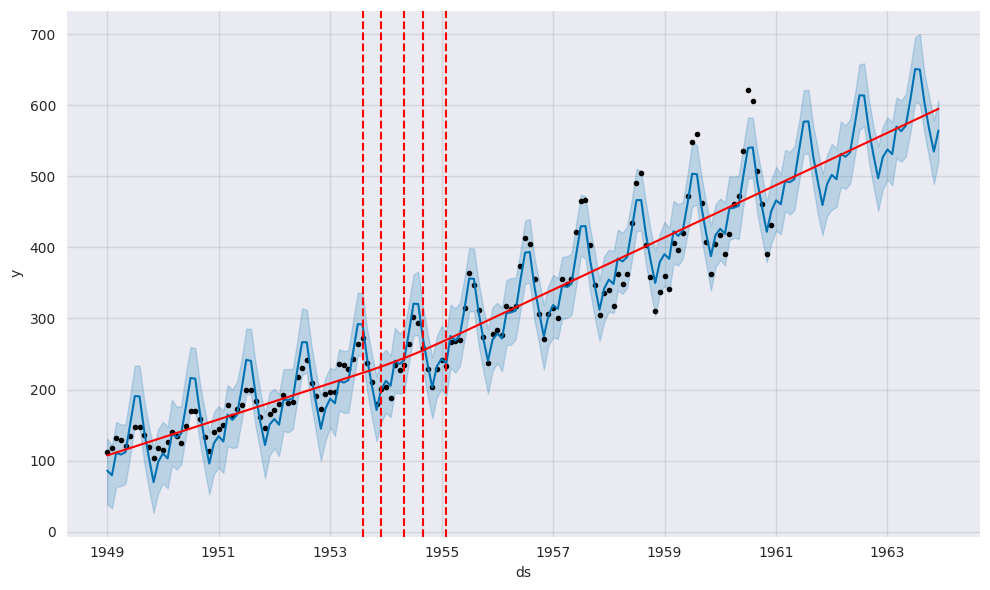

In [35]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_model, forecast)

We can view the dates where the chagepoints occurred.

In [36]:
prophet_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

We can change the inferred changepoint range by setting the changepoint_range

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


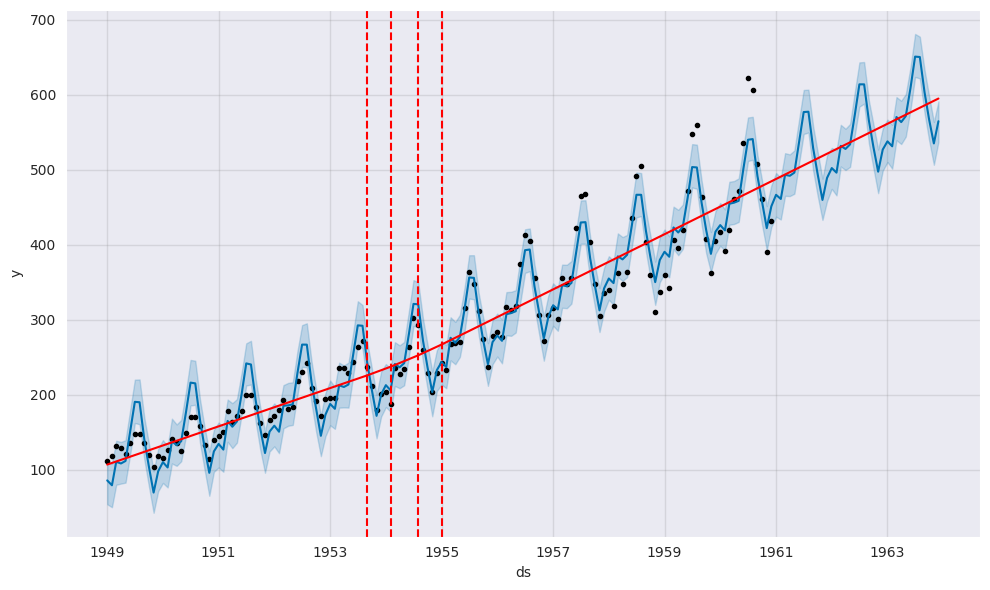

In [39]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(airline_df_copy).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

The number of changepoints can be set by using the n_changepoints parameter when initializing prophet.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


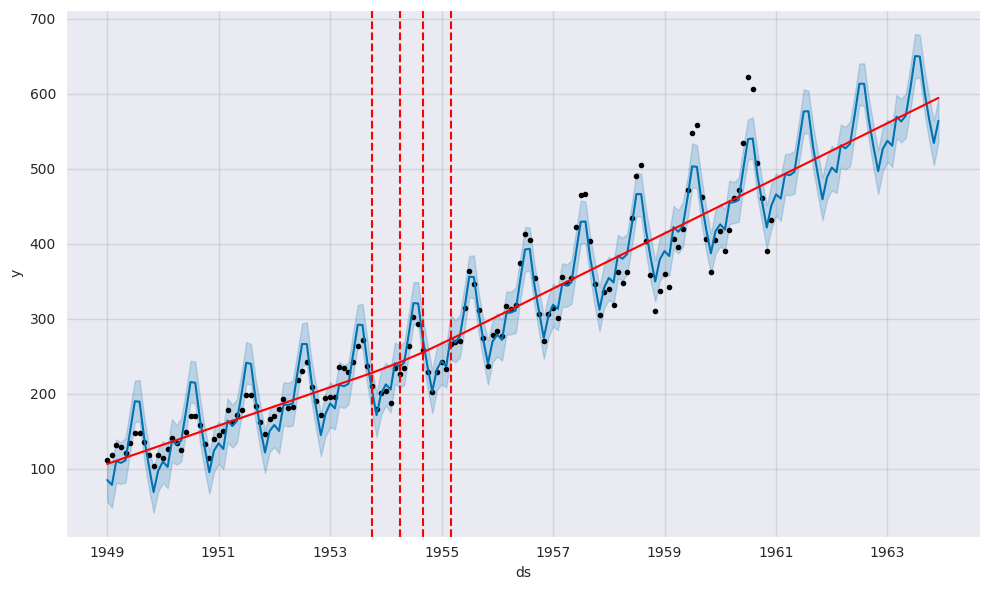

In [41]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(airline_df_copy).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

#### **Adjusting Trend**

* Prophet allows us to adjust the trend in case there is an overfit or underfit.

* changepoint_prior_scale helps adjust the strength of the trend.

* Default value for changepoint_prior_scale is 0.05.

* Decrease the value to make the trend less flexible.

* Increase the value of changepoint_prior_scale to make the trend more flexible.

* Increasing the changepoint_prior_scale to 0.08 to make the trend flexible.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


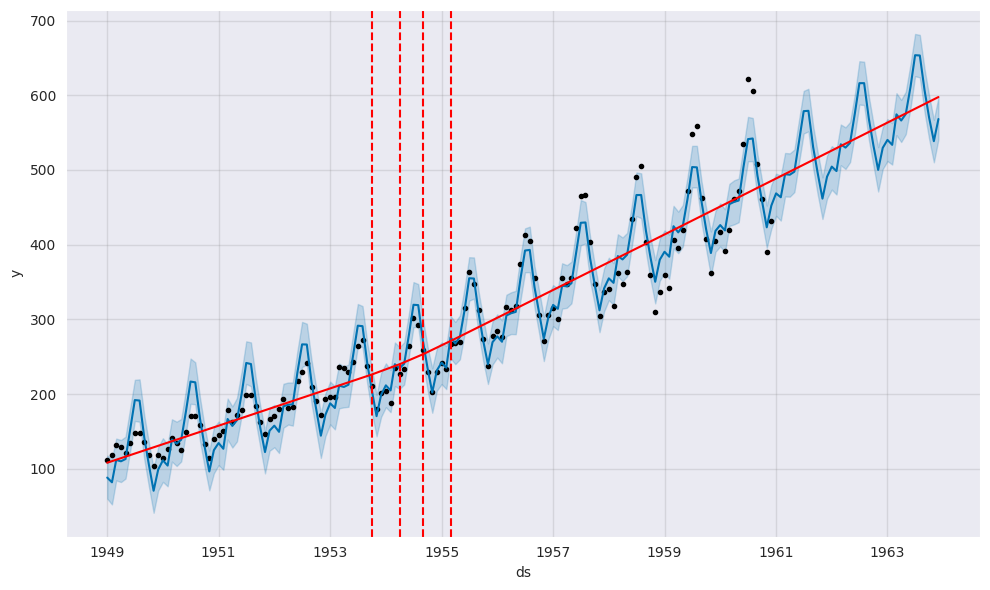

In [42]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(airline_df_copy).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


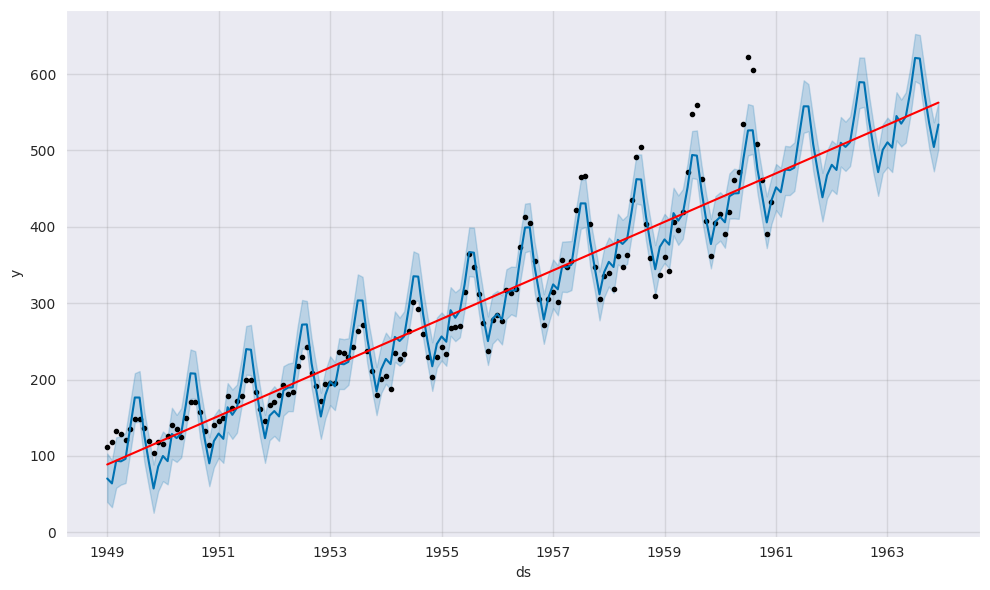

In [43]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(airline_df_copy).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

#### **Evaluation**

In [ ]:
def mse_1(observations, estimates):
    return ((observations - estimates) **2).mean()

In [ ]:
mse_1(airline_df_copy['y'], forecast['yhat'])

505.37236055751094

In [ ]:
np.sqrt(mse_1(airline_df_copy['y'], forecast['yhat']))

22.480488441257474

#### **Conclusion**

* In this tutorial, we described how to use the Prophet library to perform time series forecasting in Python.

* We have been using out-of-the box parameters, but Prophet enables us to specify many more arguments.

* In particular, Prophet provides the functionality to bring your own knowledge about time series to the table.

#### **References** 

The concepts and ideas in this section are taken from the following websites-

* https://facebook.github.io/prophet/
* https://facebook.github.io/prophet/docs/quick_start.html
* https://peerj.com/preprints/3190.pdf
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

### **10) Supervised ML**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

airline_df['Month'] = pd.to_datetime(airline_df['Month'])
airline_df.set_index('Month', inplace=True)

# Add lag features
#lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_lags = 12
for i in range (1, n_lags+1):
    airline_df[f'lag_{i}'] = airline_df['Passengers'].shift(i)

airline_df['avg_y'] = airline_df['Passengers'].rolling(window=12).mean()

# Remove missing values
df.dropna(inplace=True)

# Split the dataset into training and testing sets
train_size = int(len(airline_df) * 0.7)
train_set, test_set = airline_df[:train_size], airline_df[train_size:]

# Define the XGBOOST Regressor model
xgb_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100
)

# Train the model
X_train = train_set.drop('Passengers', axis=1)
y_train = train_set['Passengers']
print(X_train.head())
print(y_train.head())
xgb_model.fit(X_train, y_train)

# Evaluate the model
X_test = test_set.drop('Passengers', axis=1)
y_test = test_set['Passengers']
y_pred = xgb_model.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
